In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pydot
import os,sys
from scipy import stats
from scipy.stats import linregress
import matplotlib as mpl
from matplotlib import gridspec


In [2]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-LB/')
#os.chdir('/home/esb/Projects/uJ/uJ_master/experiments/HT-Sine2hr/')

In [3]:
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
#from readroi import *
#from TrackingFunctions import *
#from PlottingFunctions import *
from DataManagers import *
from PlottingFunctions import *

Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [4]:
expeLabel="HT-AMP"
rootDir="../../data_sample/HT-AMP/"
trap_list="xy01,xy02,xy03,xy04,xy05,xy06,xy07,xy11,xy12,xy13,xy14,xy15,xy16,xy21".split(",")  
trap_list="xy15".split(",")  

ncolors=50
maxFramesThr=63


cmap = cm.get_cmap("RdYlGn", ncolors)

for i,trap in enumerate(trap_list):
    dir_images=rootDir+'figures/lineages/polar/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)



In [5]:
trap_df_lineages=[]
for i,trap in enumerate(trap_list):
    
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()

Loading 498 lineages from ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_all.csv


In [6]:
df_lineages.head()

lineageID         trackID  cellID  motherID  frame                   roiID  \
0          1  55.242-127.000  55.242    55.242     55  roi_f55_n242_x455_y274   
1          1  55.242-127.000  56.248    55.242     56  roi_f56_n248_x454_y275   
2          1  55.242-127.000  57.255    55.242     57  roi_f57_n255_x454_y276   
3          1  55.242-127.000  58.250    55.242     58  roi_f58_n250_x454_y280   
4          1  55.242-127.000  59.227    55.242     59  roi_f59_n227_x454_y278   

      length  division  dead      GFP    DsRed    RelInt    AbsInt  
0  38.155172         0     0  947.122  164.500  1.425138  0.519470  
1  22.170705         0     0  993.806  172.087  1.420538  0.544371  
2  25.012120         0     0  955.521  167.402  1.438318  0.526030  
3  29.546645         0     0  920.397  167.059  1.492355  0.514658  
4  31.215197         0     0  906.689  164.378  1.490562  0.506726

## Plot polar complete lineages

xy15


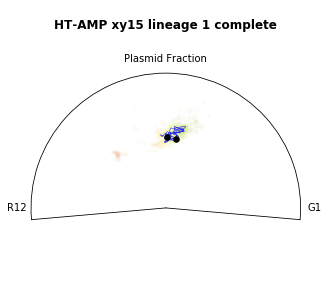

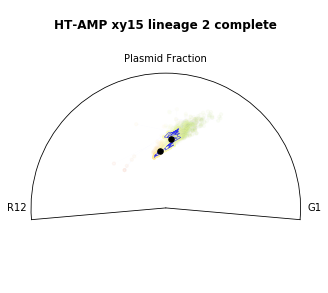

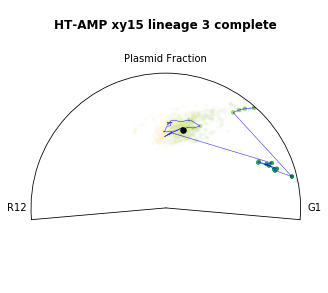

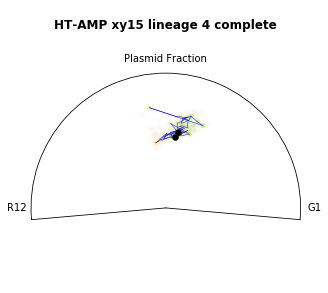

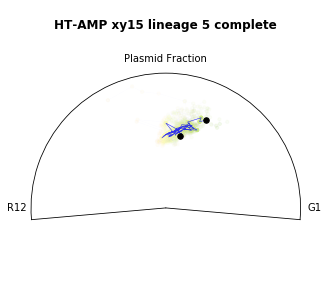

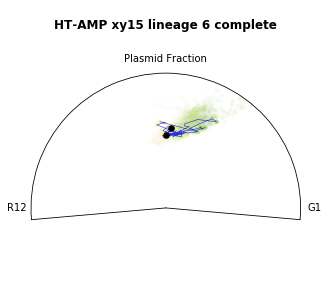

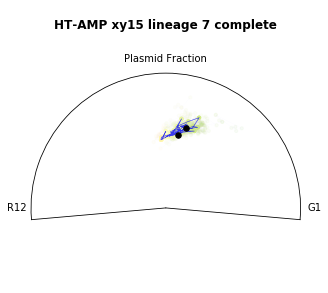

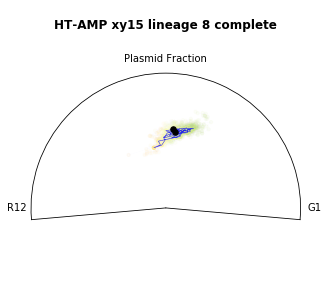

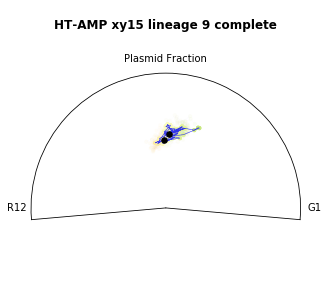

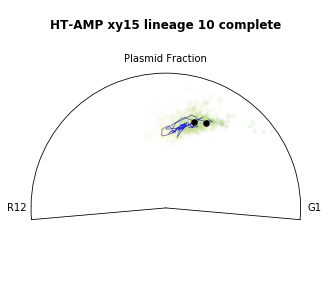

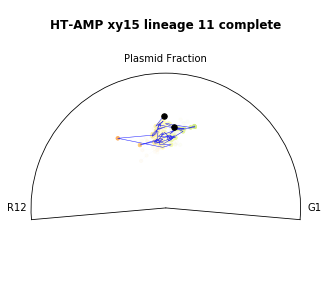

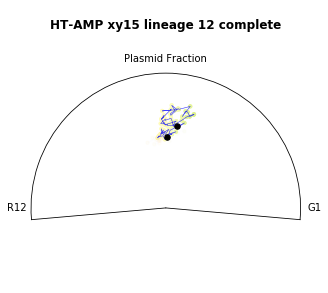

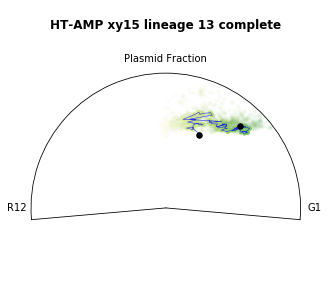

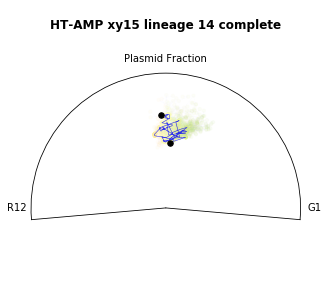

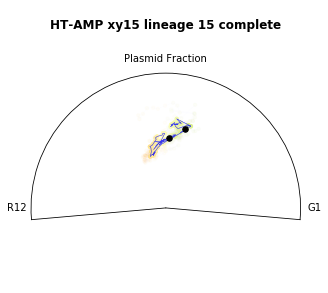

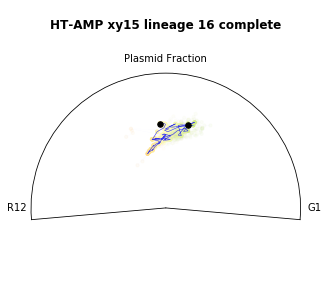

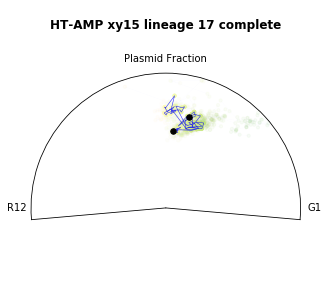

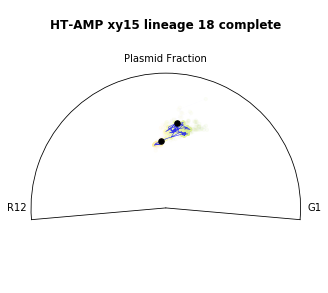

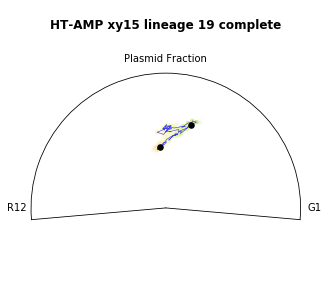

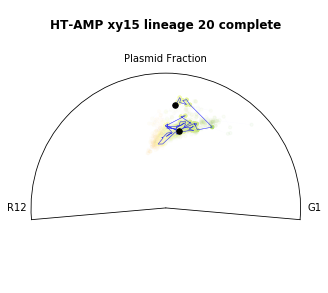

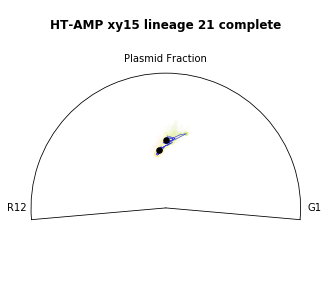

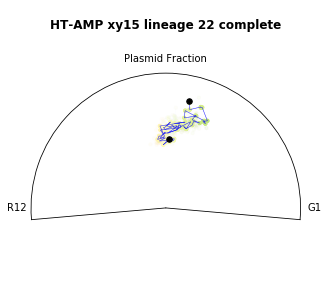

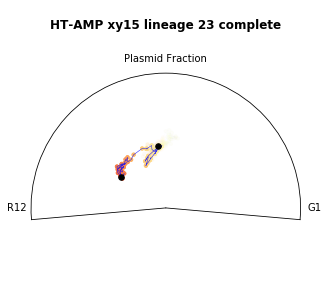

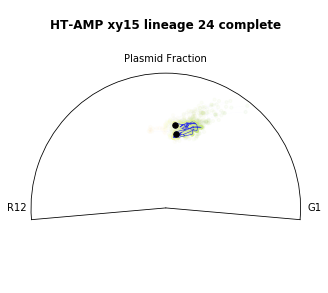

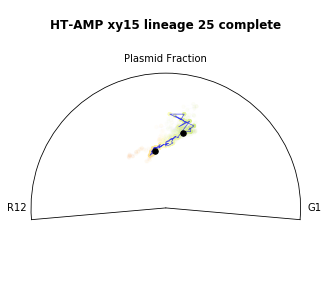

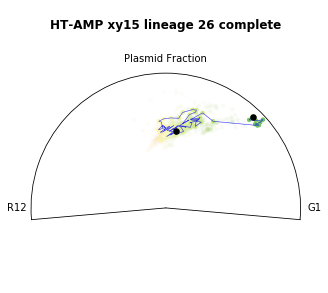

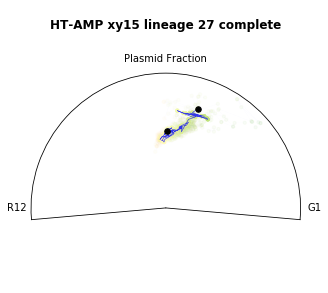

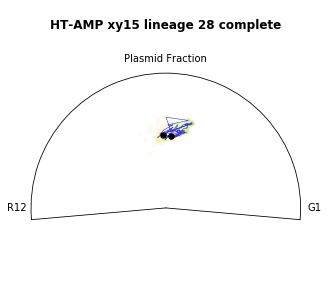

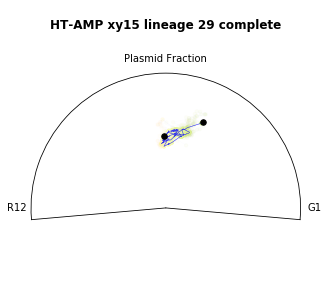

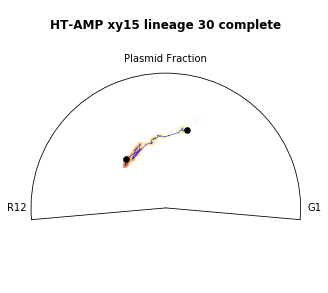

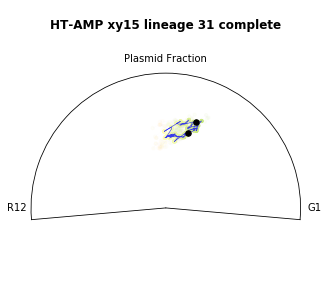

In [7]:
def plot_polar_fancy_tracks(ax,this_df,alphs,alphp):
    
    phis01=list(this_df["RelInt"])
    rhos01=list(this_df["AbsInt"])
    
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alphs)
    ax.plot(phis01, rhos01,c='b',linewidth=.5,alpha=alphp)
    if(alphs==1):
        startp=phis01[0]
        startr=rhos01[0]
        endp=phis01[-1]
        endr=rhos01[-1]
        ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alphs,zorder=2)
        ax.plot(phis01, rhos01,c='b',linewidth=.5,alpha=alphp,zorder=2)
        ax.scatter(startp,startr,s=30,c='k',zorder=3)
        ax.scatter(endp,endr,s=30,c='k',zorder=3)    

    return ax


for i,trap in enumerate(trap_list):
    dir_images=rootDir+'figures/lineages/polar/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)

    
    df_lineages=trap_df_lineages[i]
    print(trap)

    for linID in df_lineages.lineageID.unique():

        this_ldf=df_lineages[df_lineages["lineageID"]==linID]
        frames=this_ldf.frame.unique()
        nframes=len(frames)
        if(nframes<maxFramesThr):
            continue
        fig= plt.figure( figsize=(5, 5))
        ax=plt.subplot(projection='polar')
        longest_track=""
        maxFrames=0
        for trackID in this_ldf.trackID.unique():
            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            frames=this_tdf.frame.unique()
            nframes=len(frames)
            if maxFrames<nframes: 
                maxFrames=nframes
                longest_track=trackID

        for trackID in this_ldf.trackID.unique():
            alphs=.05
            alphp=.01
            if trackID==longest_track:
                alphs=1
                alphp=.5

            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            ax=plot_polar_fancy_tracks(ax,this_tdf,alphs,alphp)

        ax.set_rmax(1)
        ax.set_rticks(ticks=[])
        ax.set_thetamin(-5)
        ax.set_thetamax(185)
        ax.grid(False)
        ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
        #ax.set_title("%s"%(pop), va='bottom')
        ax.set_title("%s %s lineage %s complete"%(expeLabel,trap,linID), va='bottom',fontweight='bold')
        ax.title.set_position([.5, .9])
        figName="%s%s_%s_lineage-%s_complete.png"%(dir_images,expeLabel,trap,linID)
        plt.savefig(figName)
        plt.show()
        #print(xx)

## Plot polar lineages longest track 

xy15


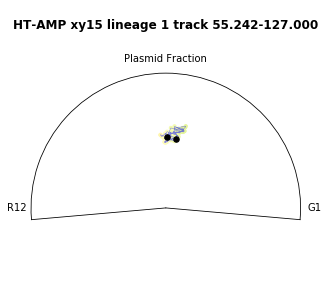

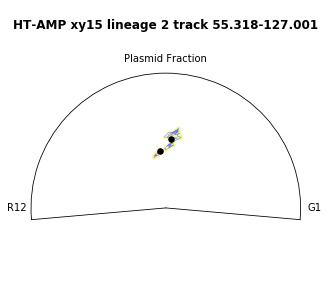

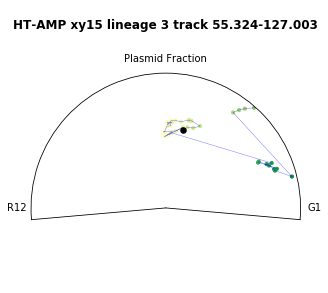

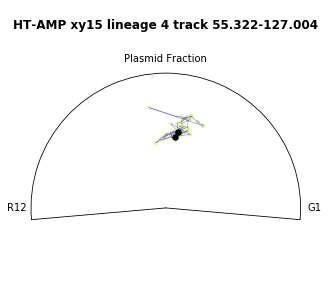

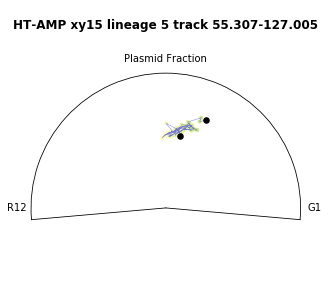

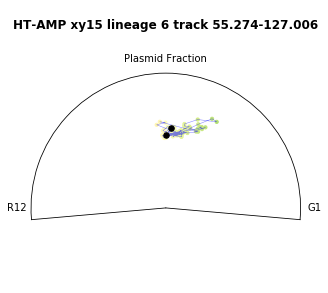

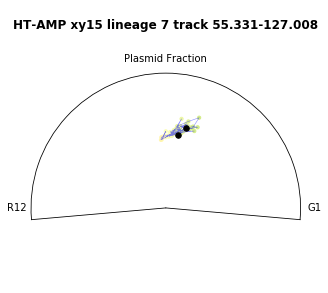

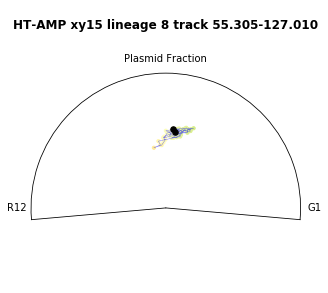

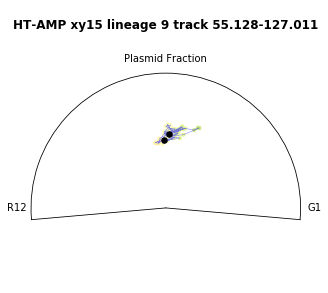

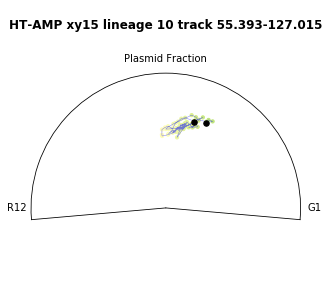

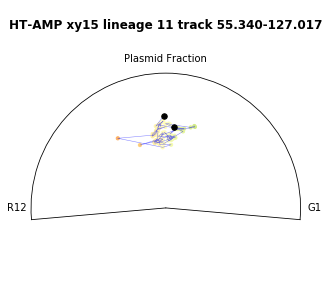

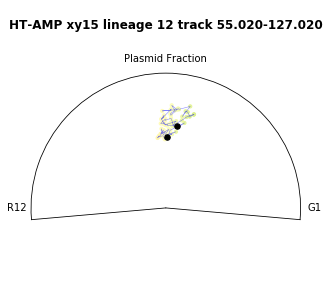

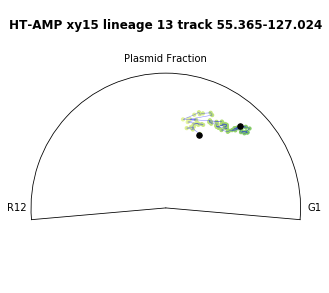

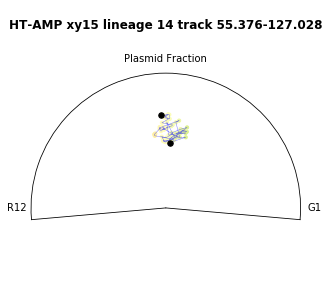

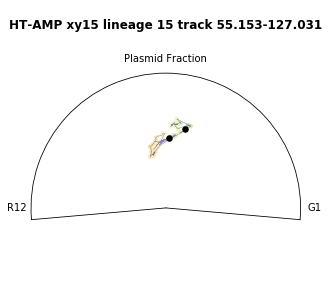

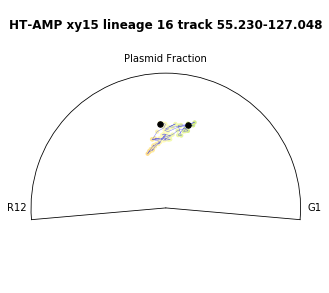

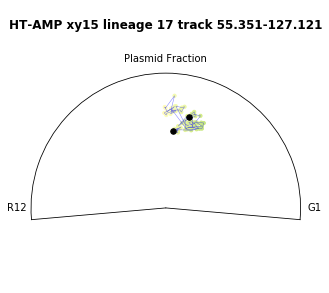

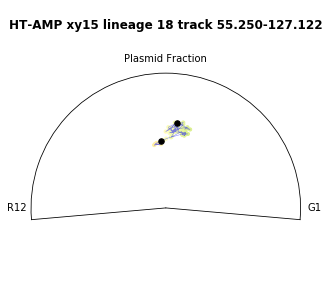

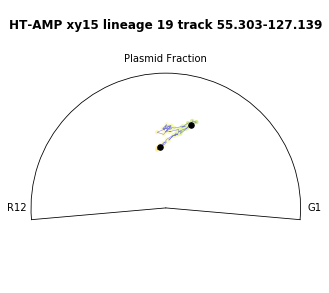

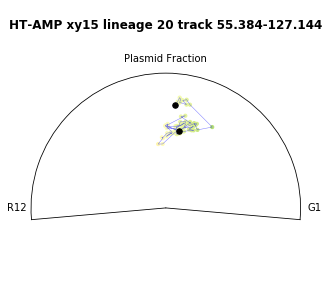

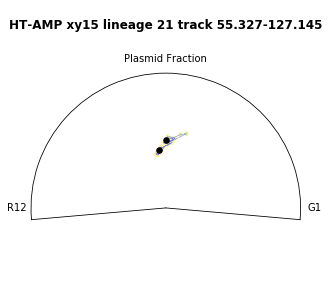

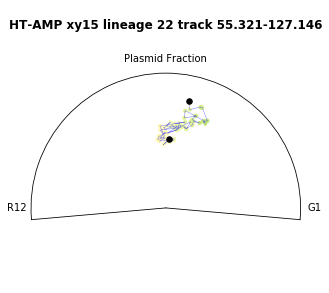

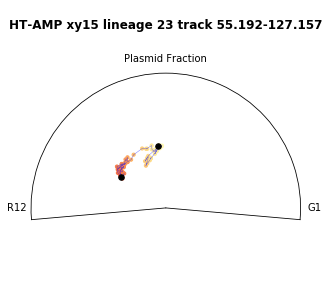

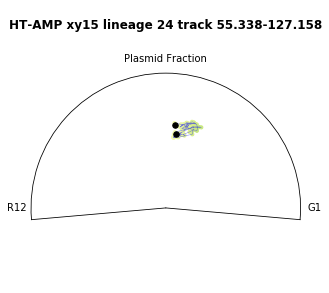

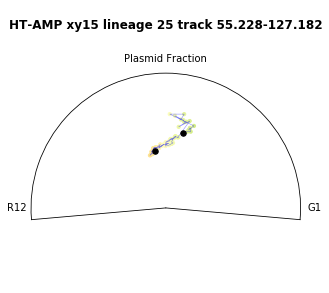

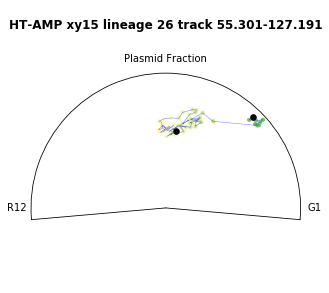

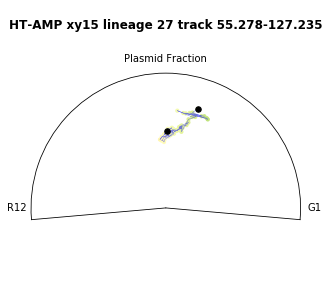

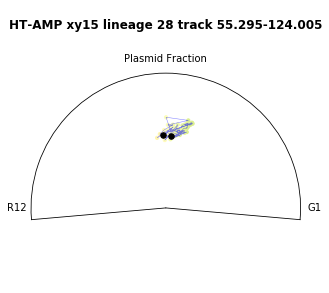

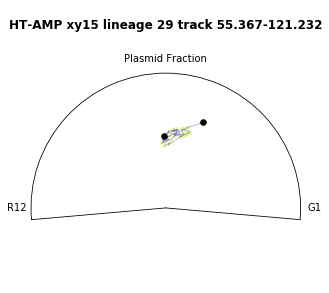

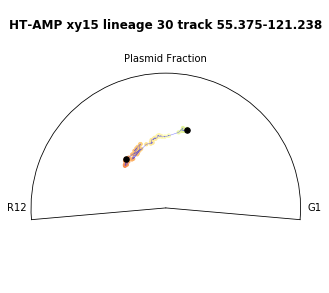

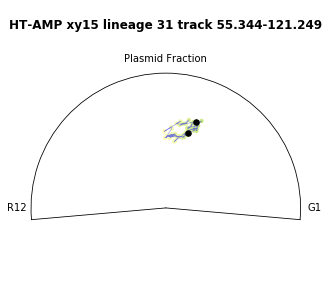

In [8]:
def plot_polar_fancy_tracks(ax,this_df,alphs,alphp):
    
    phis01=list(this_df["RelInt"])
    rhos01=list(this_df["AbsInt"])
    
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alphs)
    ax.plot(phis01, rhos01,c='b',linewidth=.5,alpha=alphp)
    if(alphs==1):
        startp=phis01[0]
        startr=rhos01[0]
        endp=phis01[-1]
        endr=rhos01[-1]

        ax.scatter(startp,startr,s=30,c='k',zorder=3)
        ax.scatter(endp,endr,s=30,c='k',zorder=3)    

    return ax


for i,trap in enumerate(trap_list):
    dir_images=rootDir+'figures/lineages/polar/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)

    
    df_lineages=trap_df_lineages[i]
    print(trap)

    for linID in df_lineages.lineageID.unique():

        this_ldf=df_lineages[df_lineages["lineageID"]==linID]
        frames=this_ldf.frame.unique()
        nframes=len(frames)
        if(nframes<maxFramesThr):
            continue
        fig= plt.figure( figsize=(5, 5))
        ax=plt.subplot(projection='polar')
        longest_track=""
        maxFrames=0
        for trackID in this_ldf.trackID.unique():
            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            frames=this_tdf.frame.unique()
            nframes=len(frames)
            if maxFrames<nframes: 
                maxFrames=nframes
                longest_track=trackID

        for trackID in this_ldf.trackID.unique():
            alphs=.05
            alphp=.01
            if trackID==longest_track:
                alphs=1
                alphp=.5

                this_tdf=this_ldf[this_ldf["trackID"]==trackID]
                ax=plot_polar_fancy_tracks(ax,this_tdf,alphs,alphp)

        ax.set_rmax(1)
        ax.set_rticks(ticks=[])
        ax.set_thetamin(-5)
        ax.set_thetamax(185)
        ax.grid(False)
        ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
        #ax.set_title("%s"%(pop), va='bottom')
        ax.set_title("%s %s lineage %s track %s"%(expeLabel,trap,linID,longest_track), va='bottom',fontweight='bold')
        ax.title.set_position([.5, .9])
        figName="%s%s_%s_lineage-%s_track-%s.png"%(dir_images,expeLabel,trap,linID,longest_track)
        plt.savefig(figName)
        plt.show()
        #print(xx)

## Exporting time series plots 

xy15


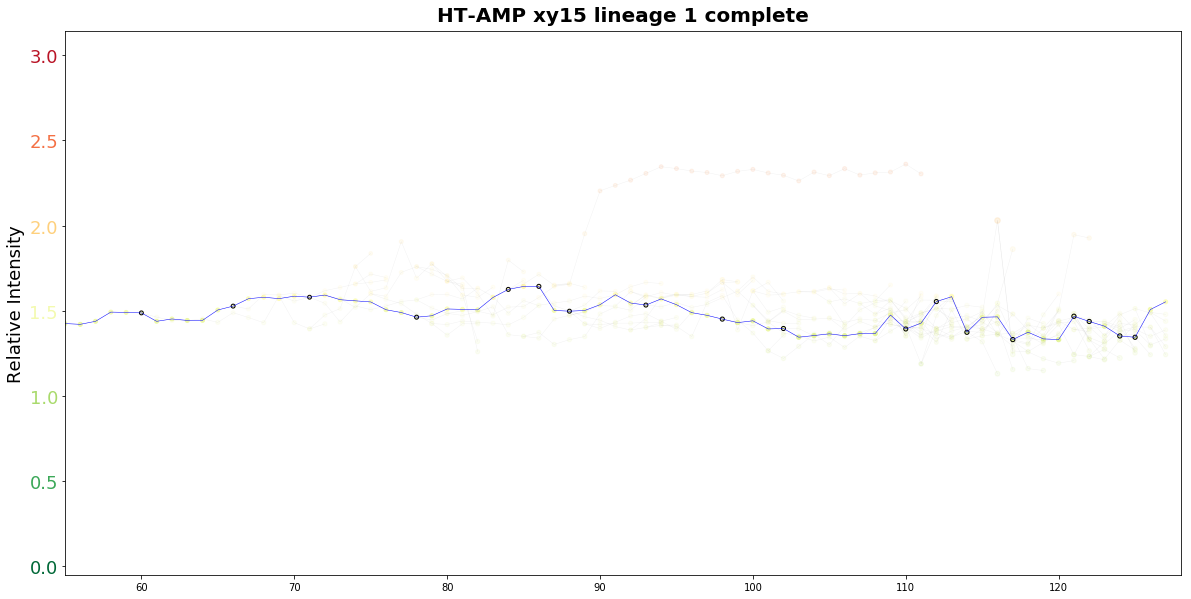

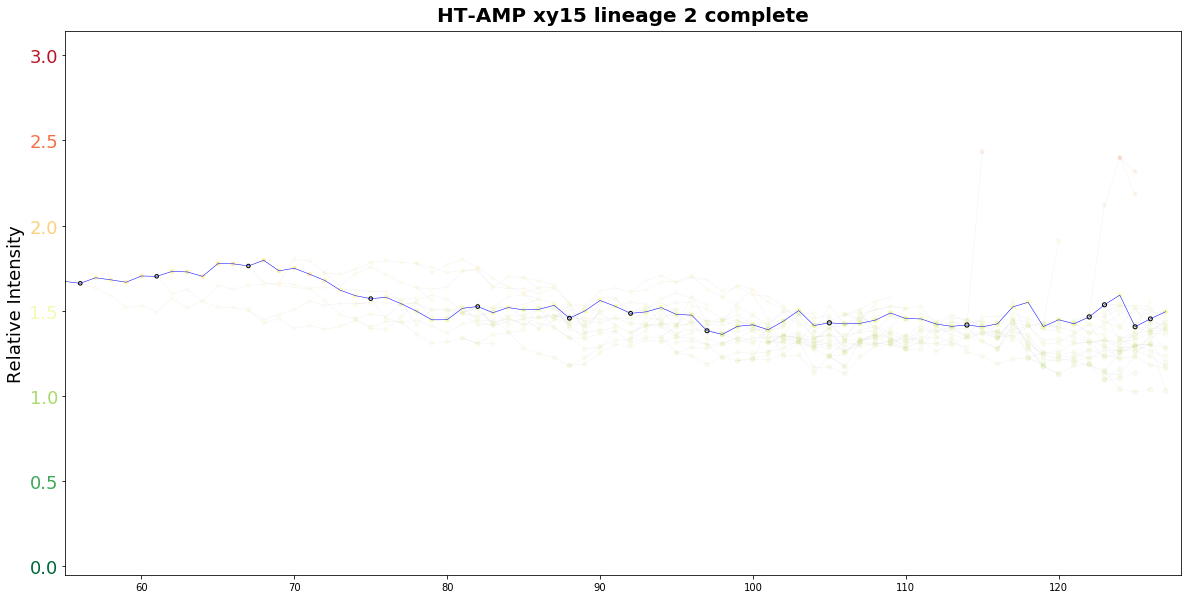

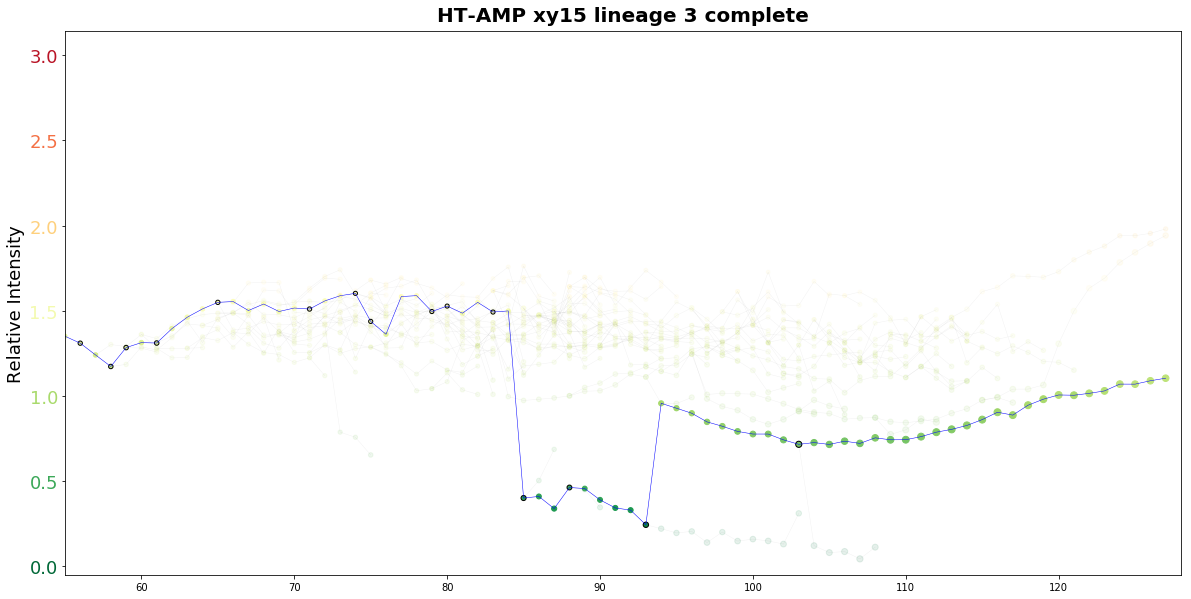

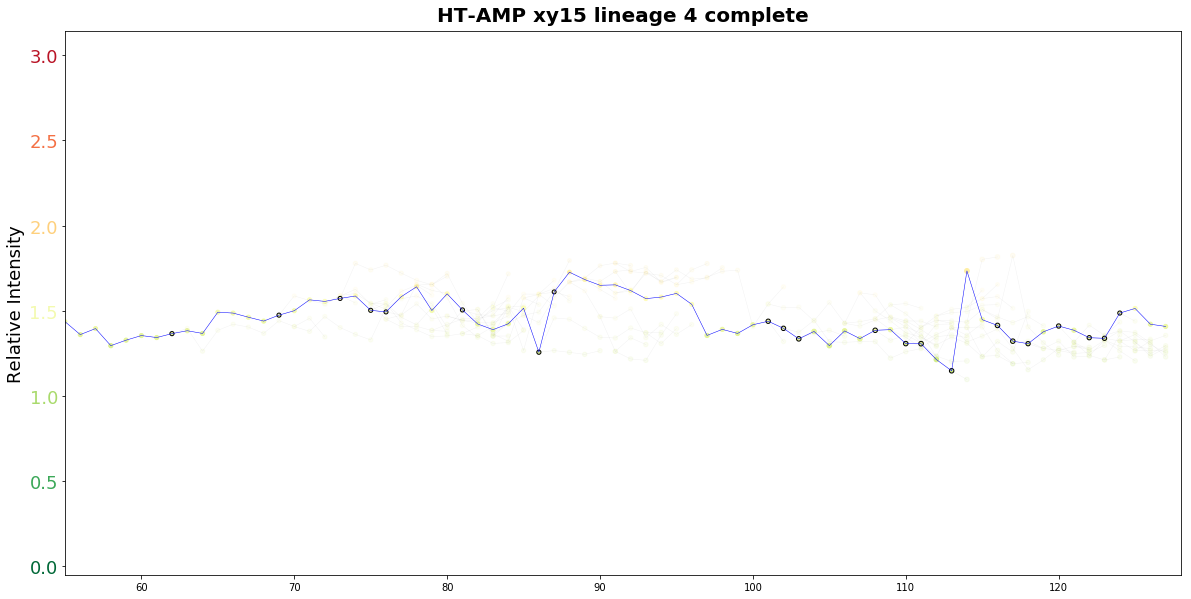

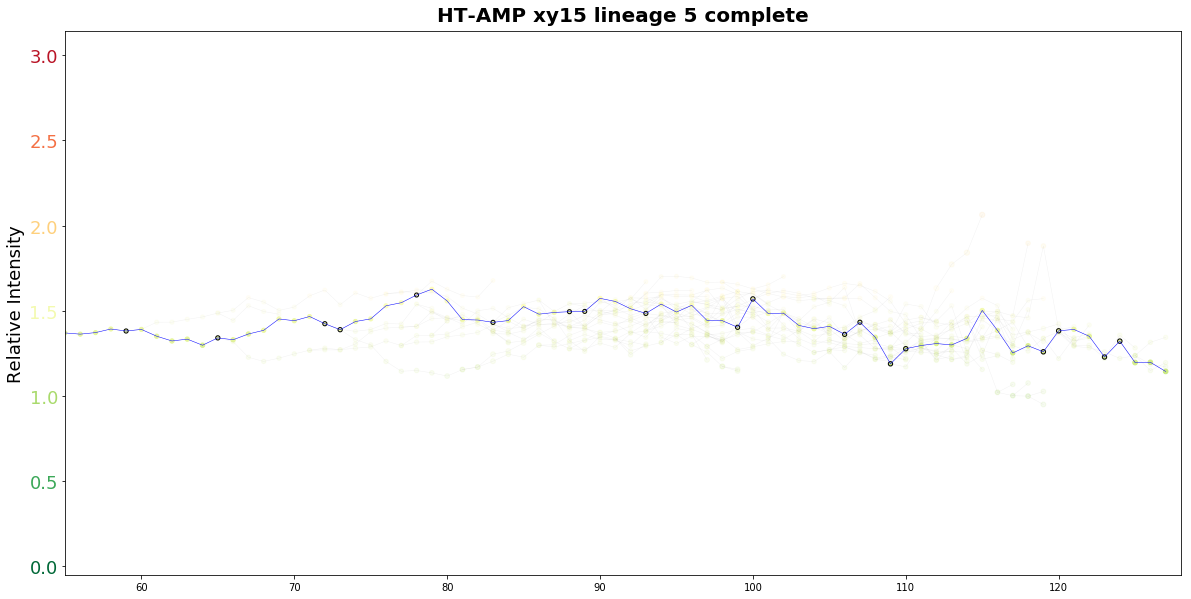

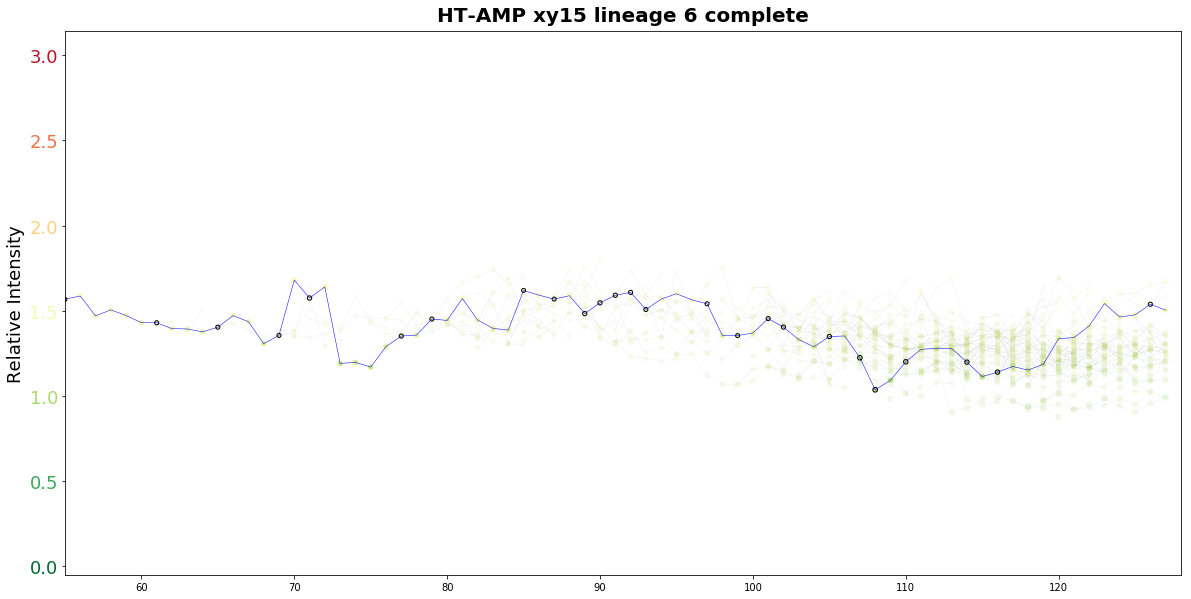

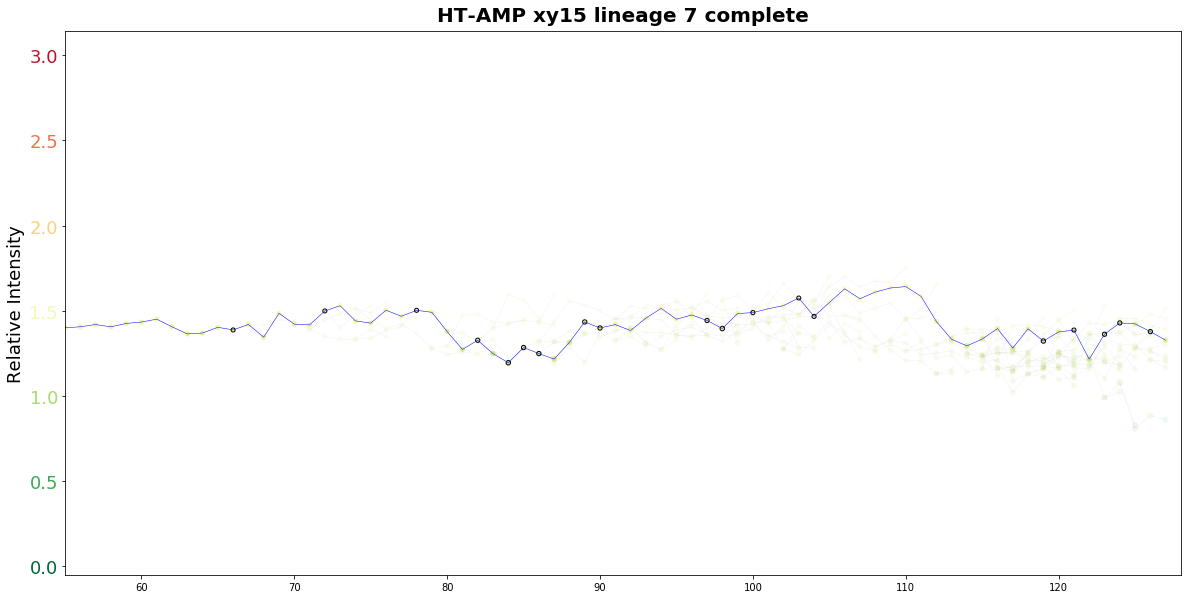

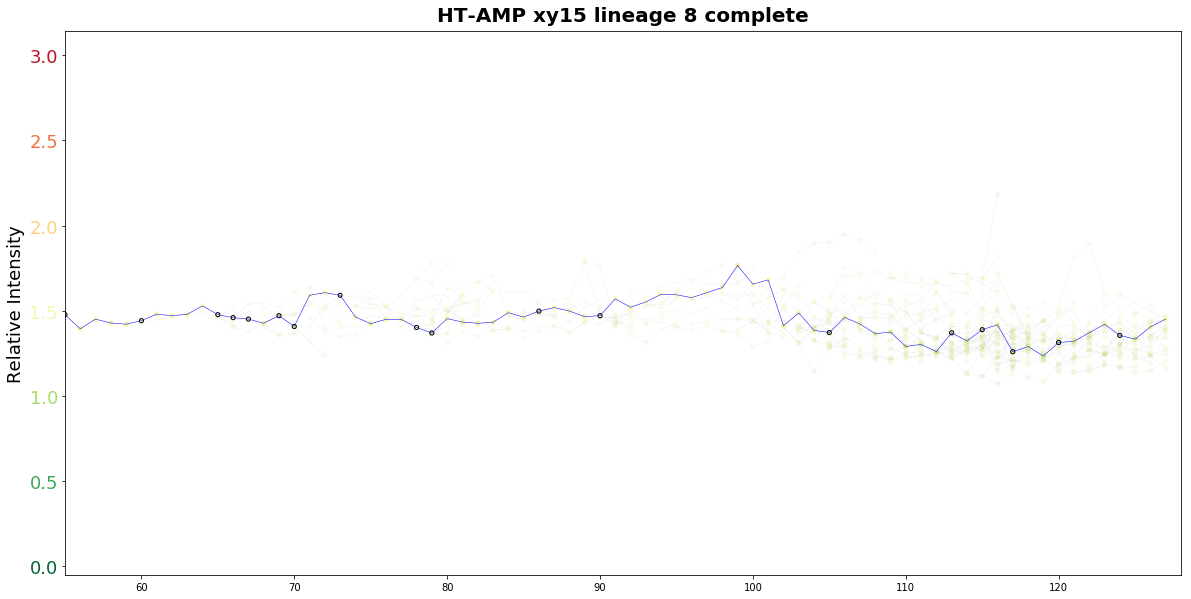

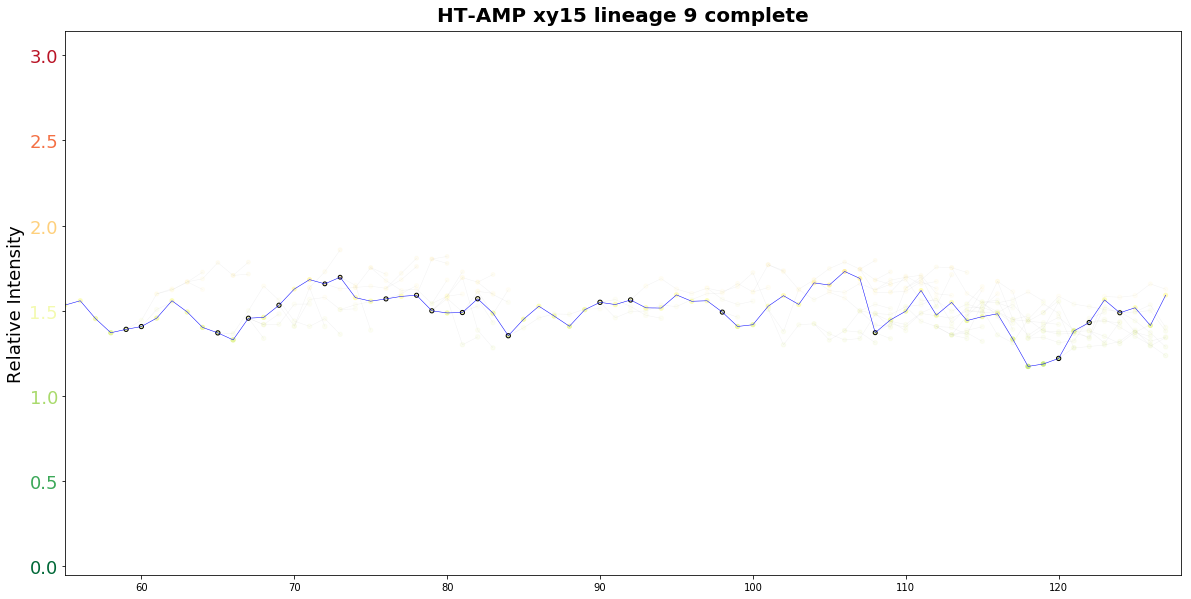

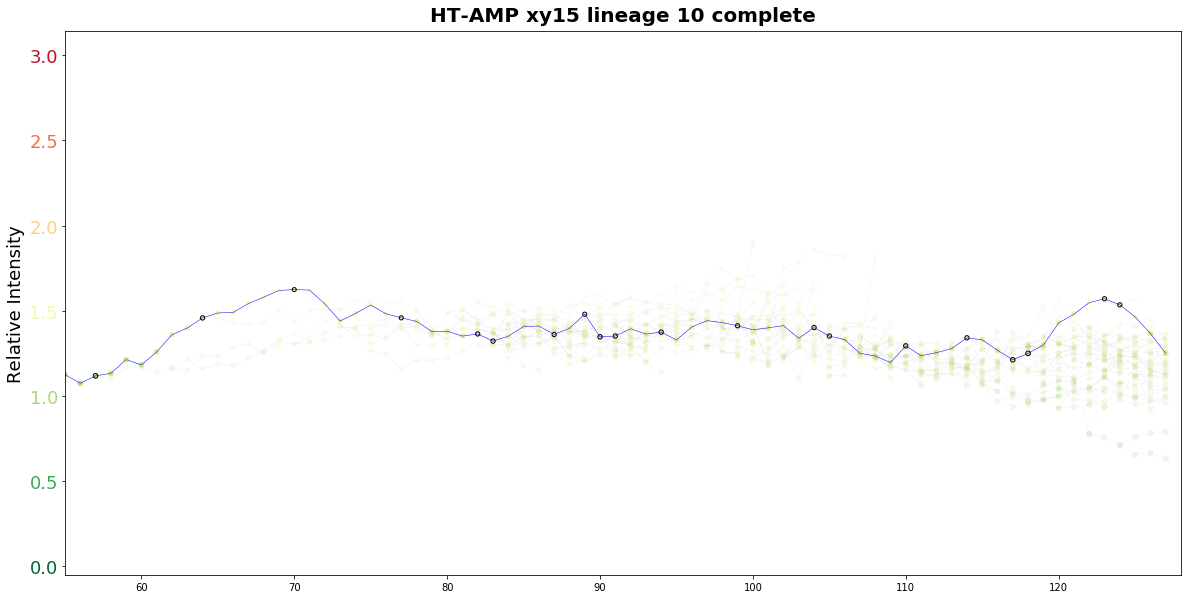

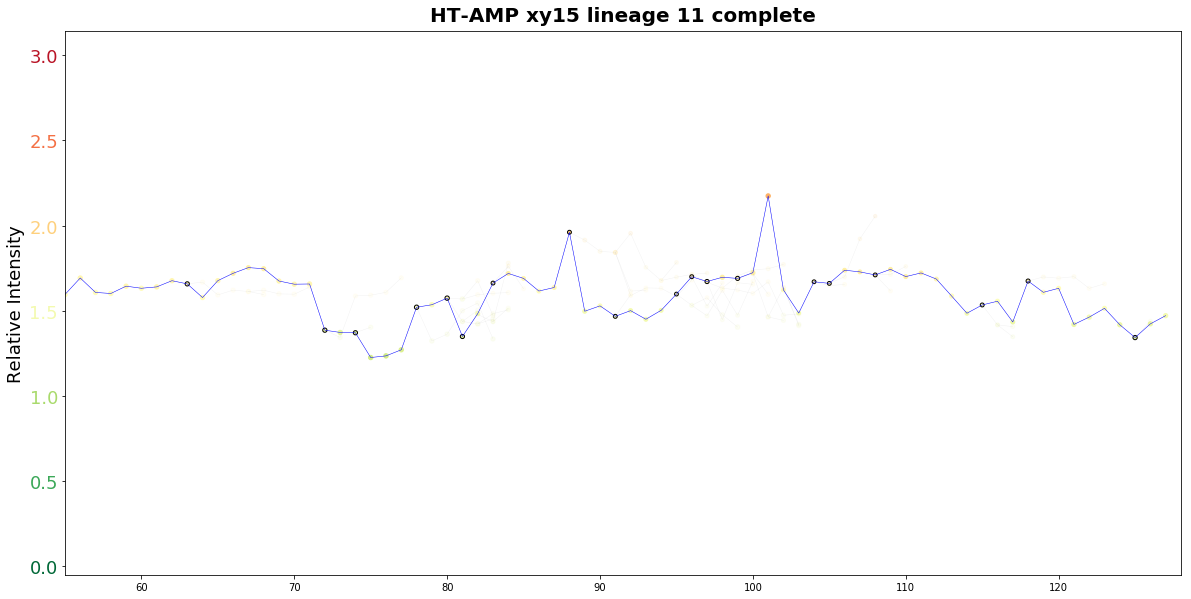

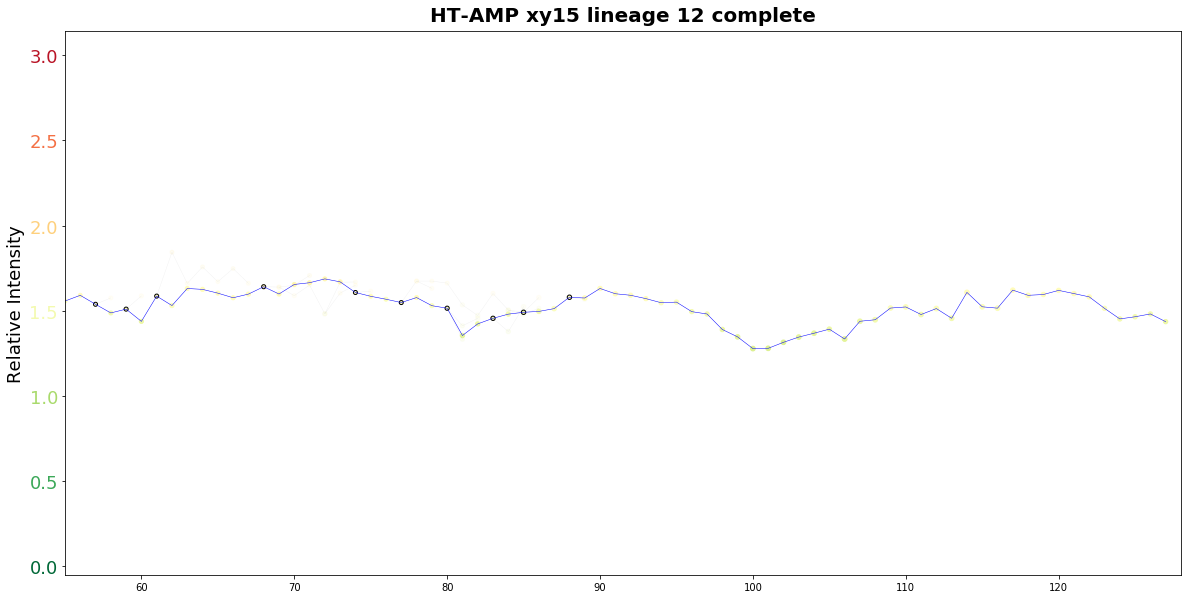

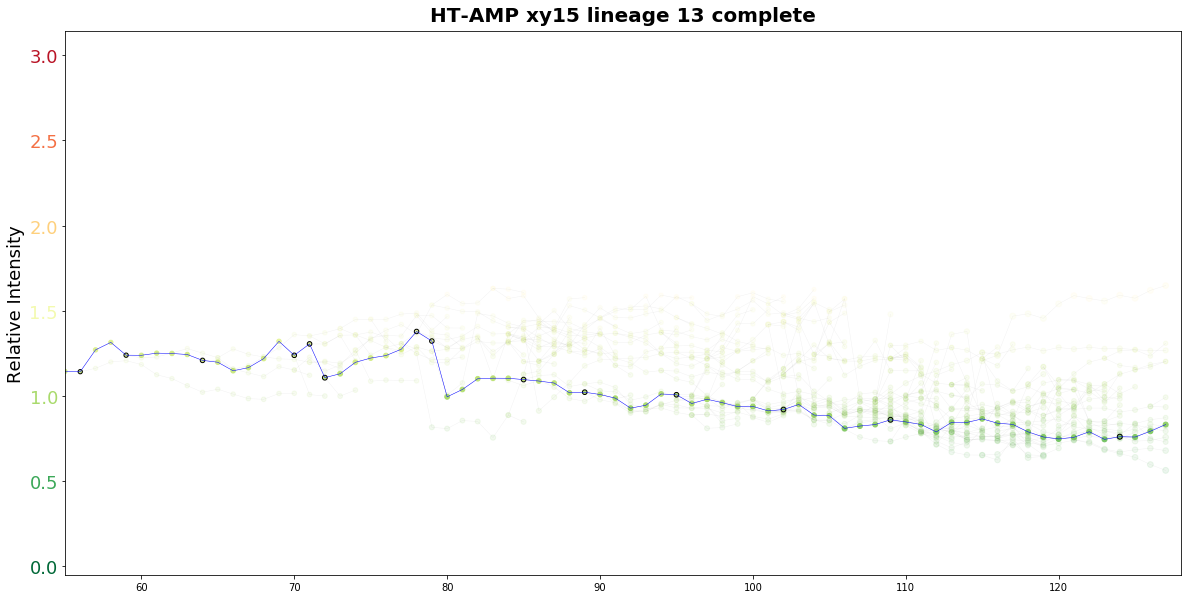

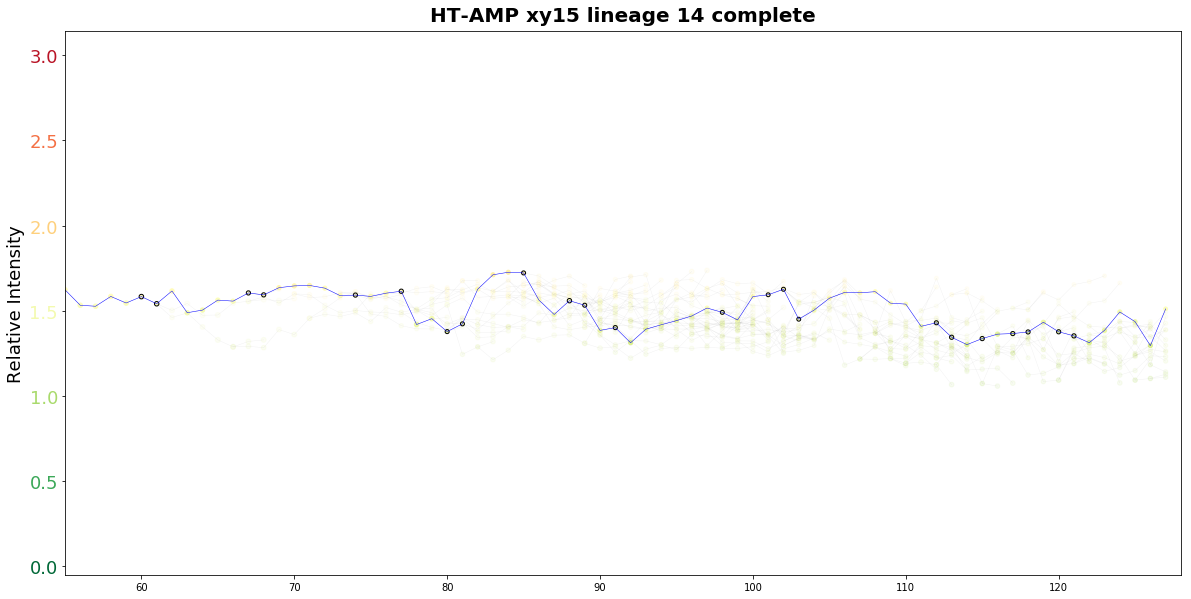

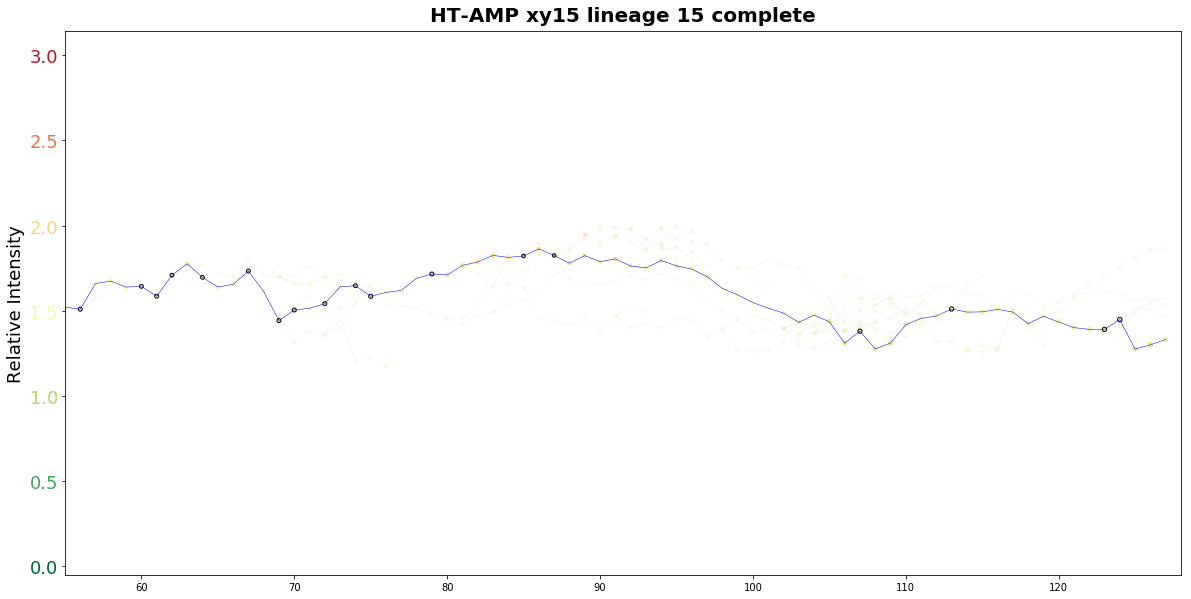

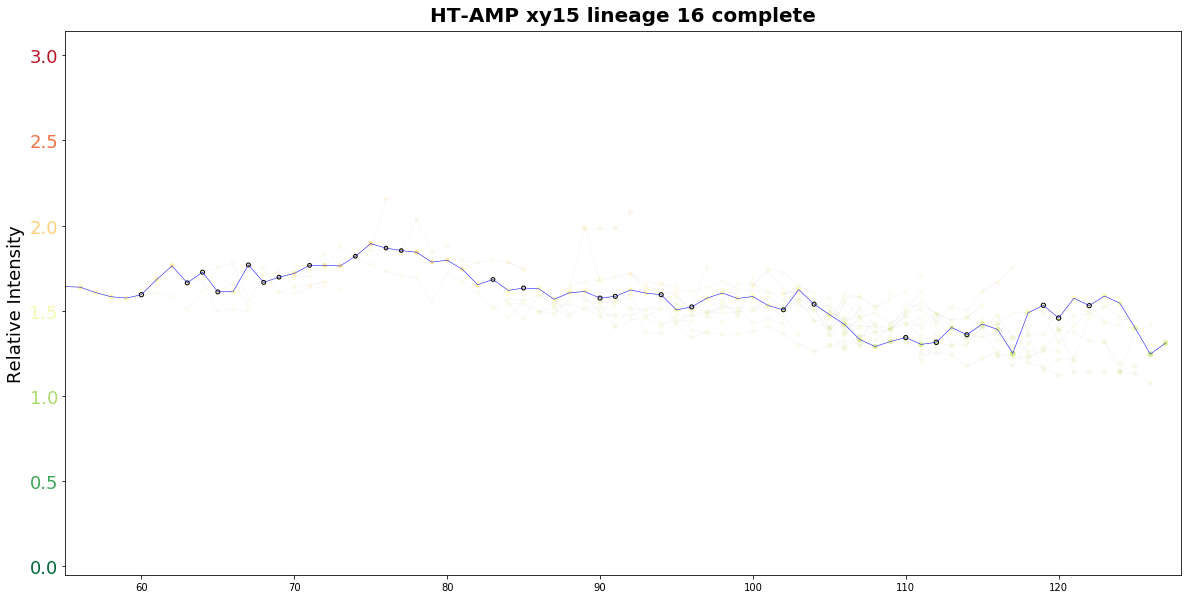

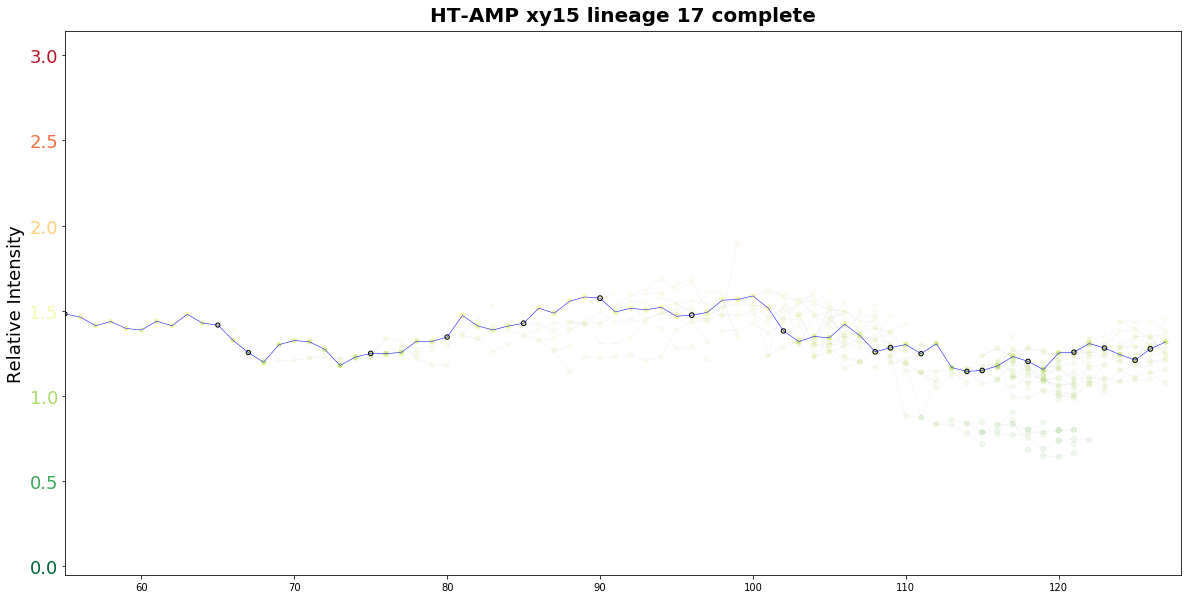

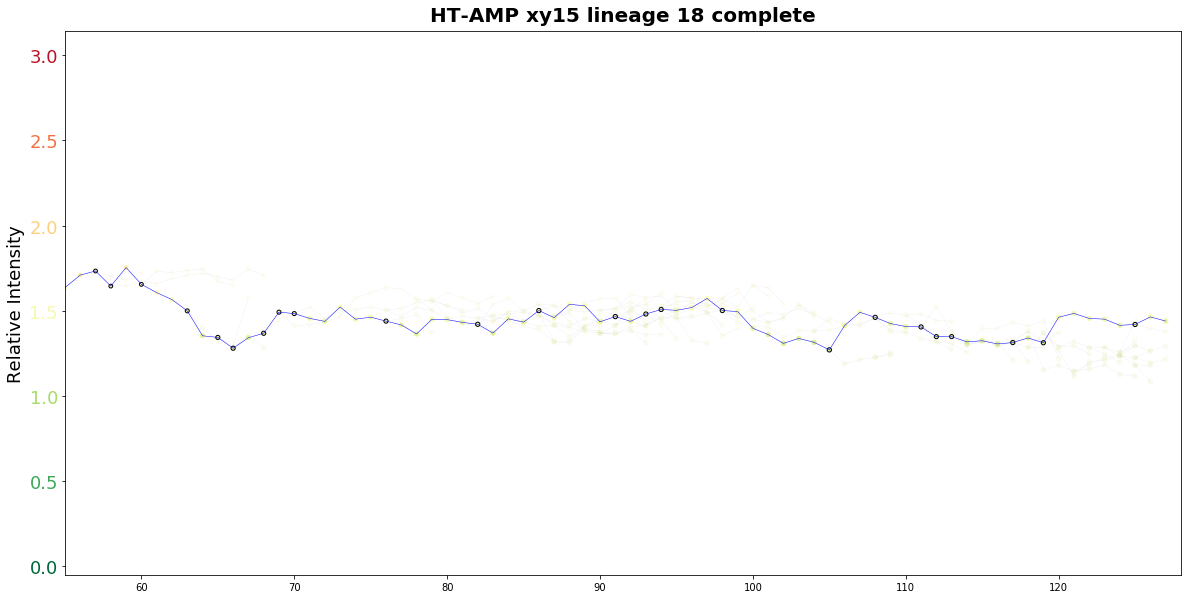

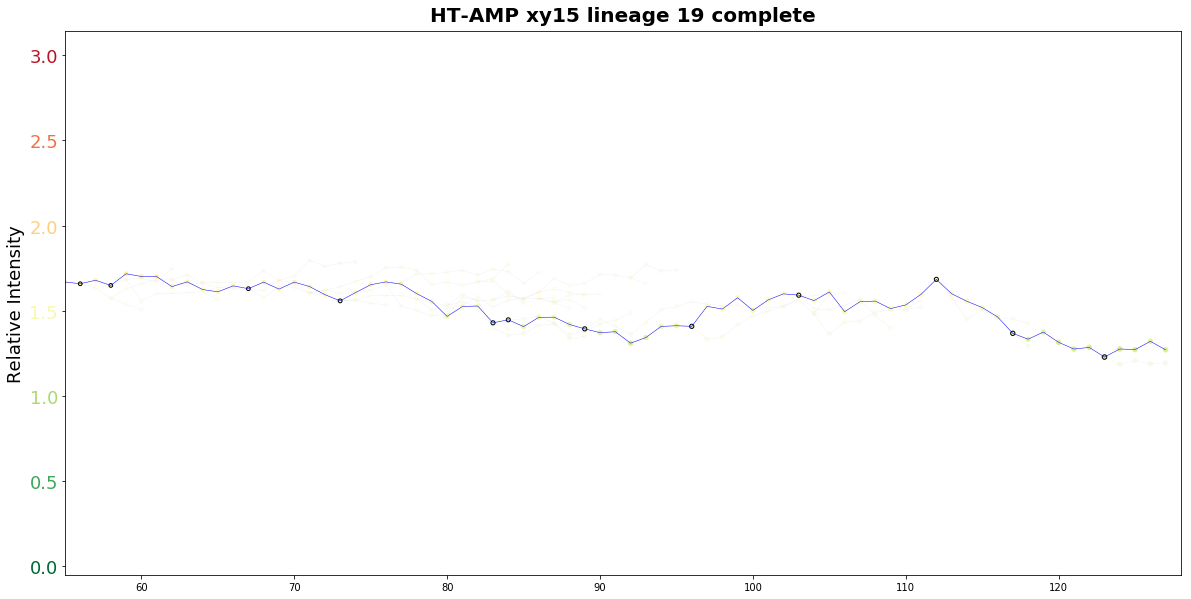

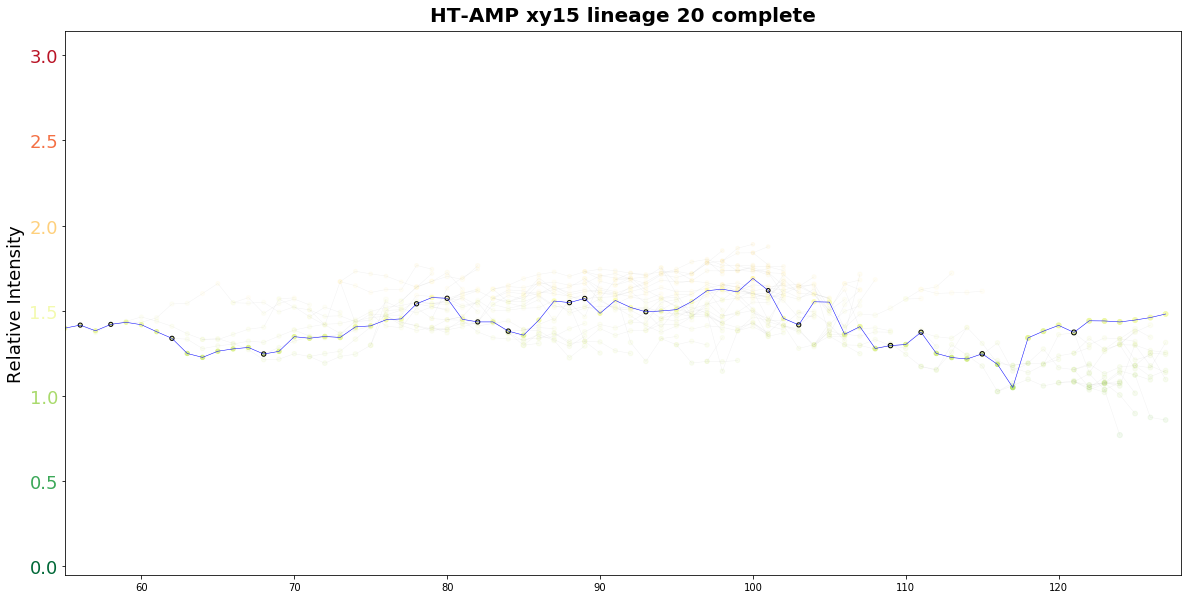

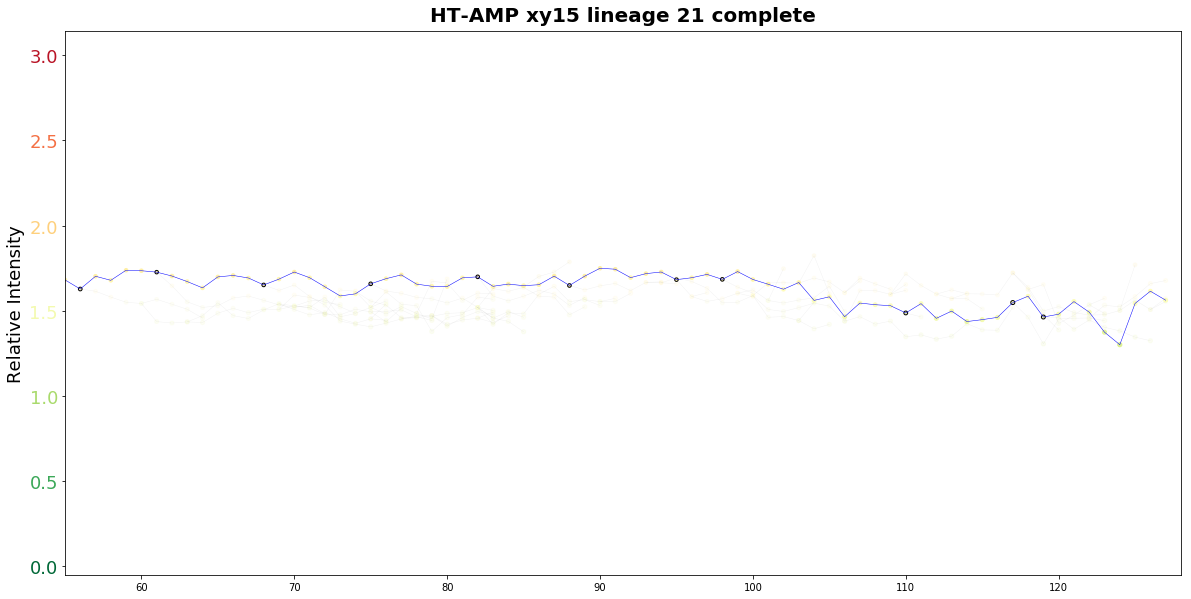

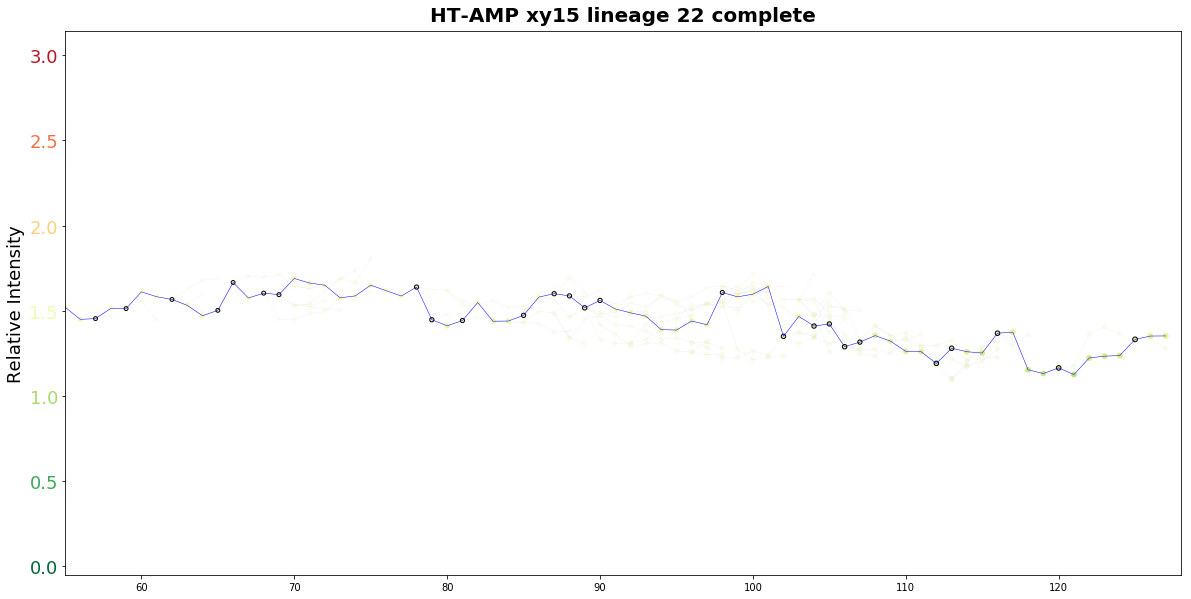

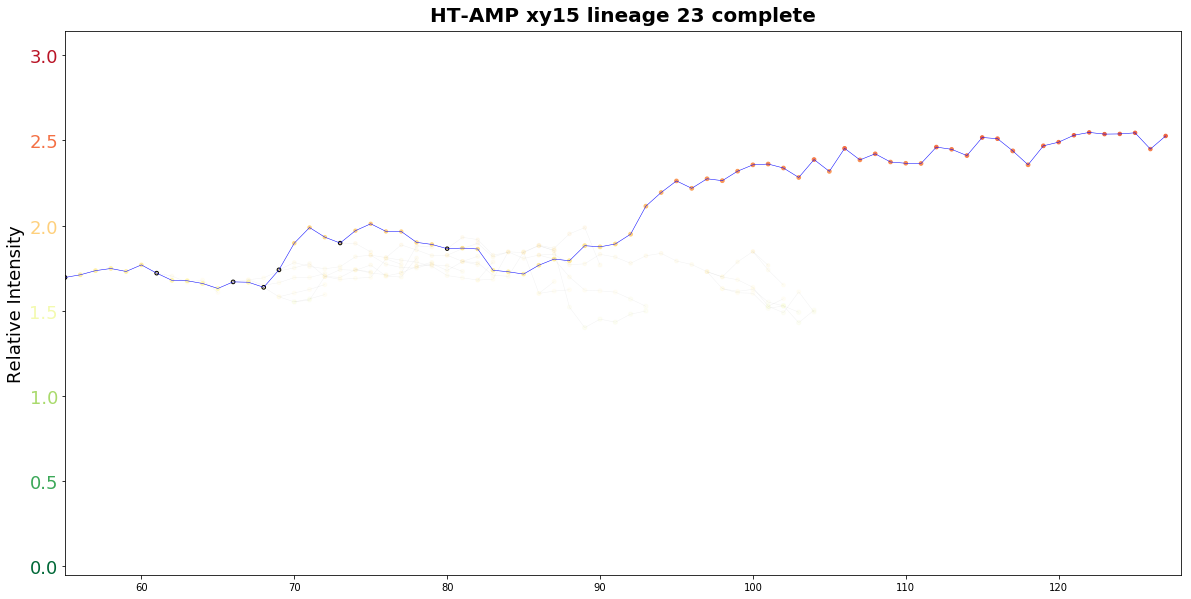

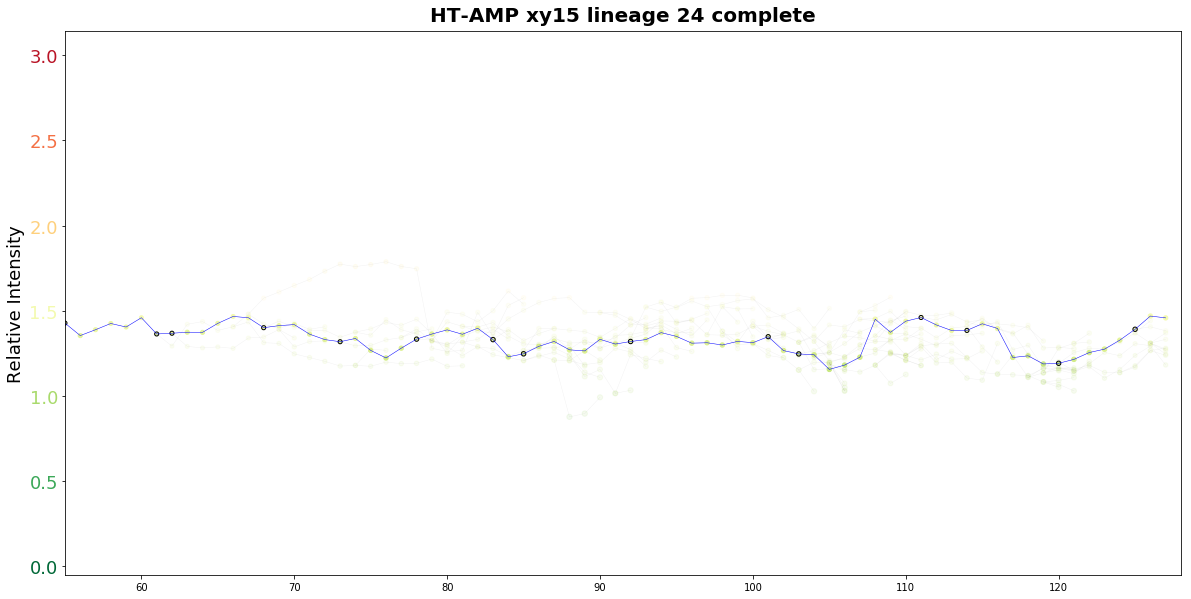

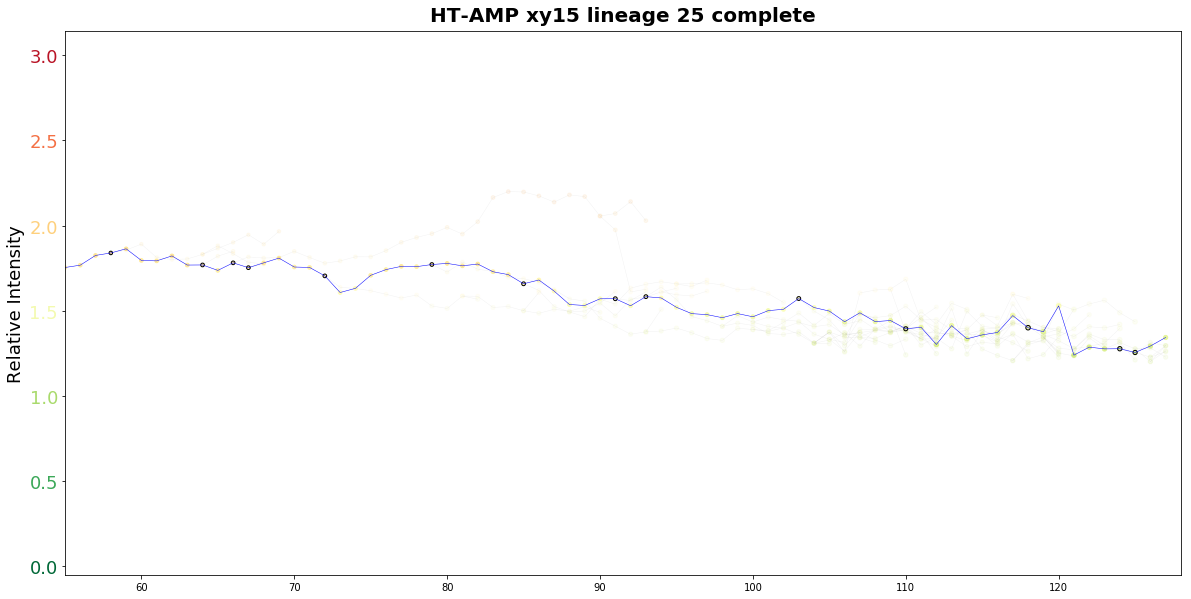

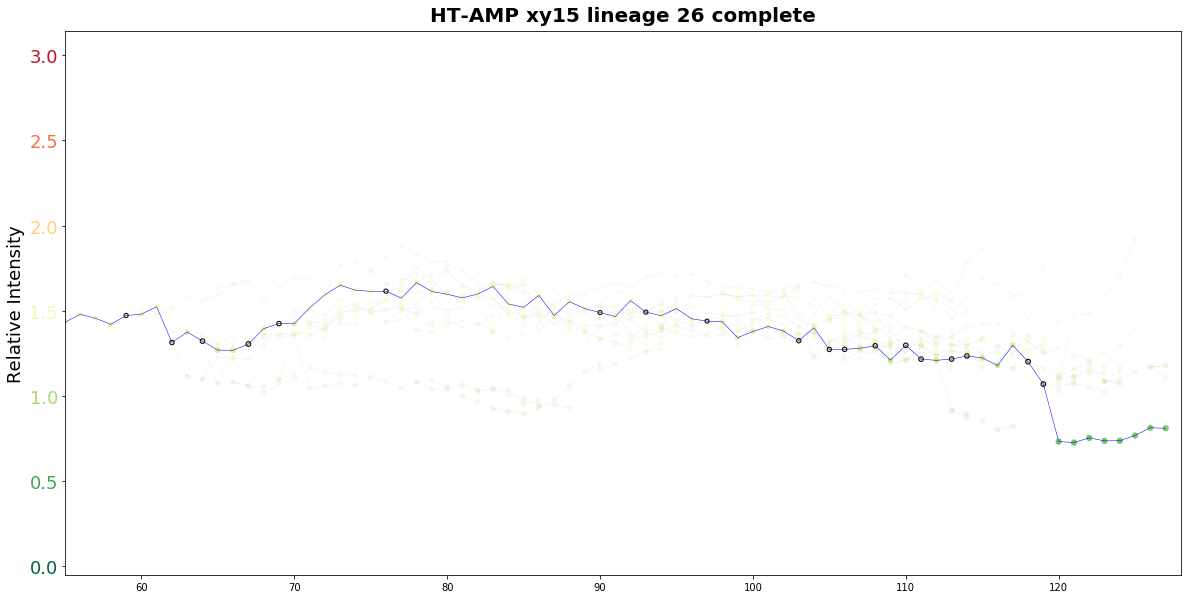

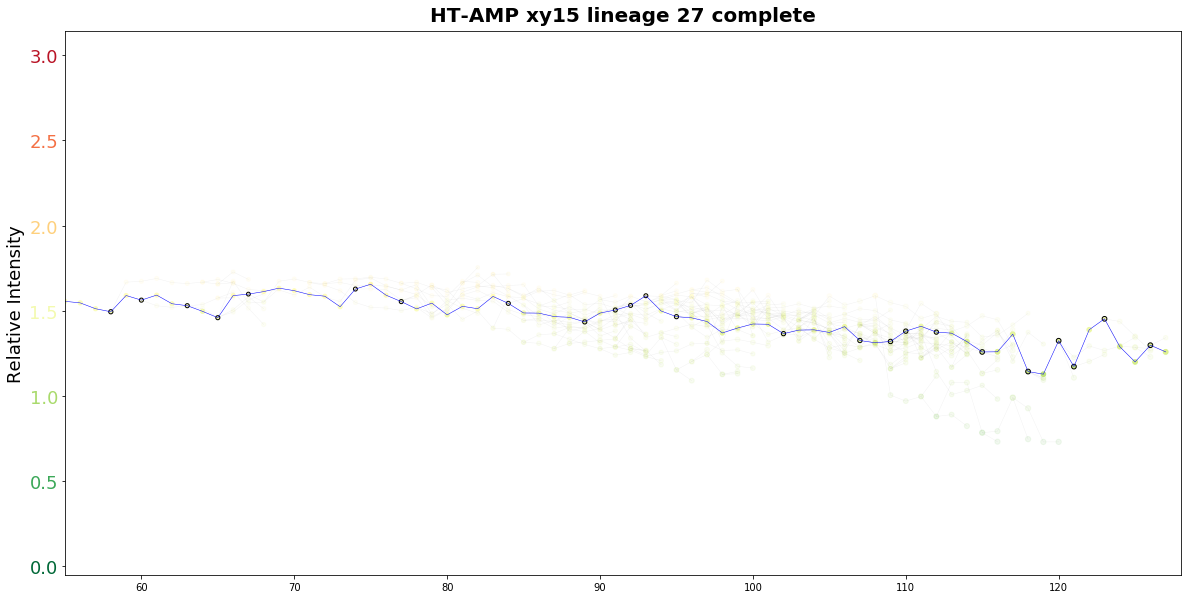

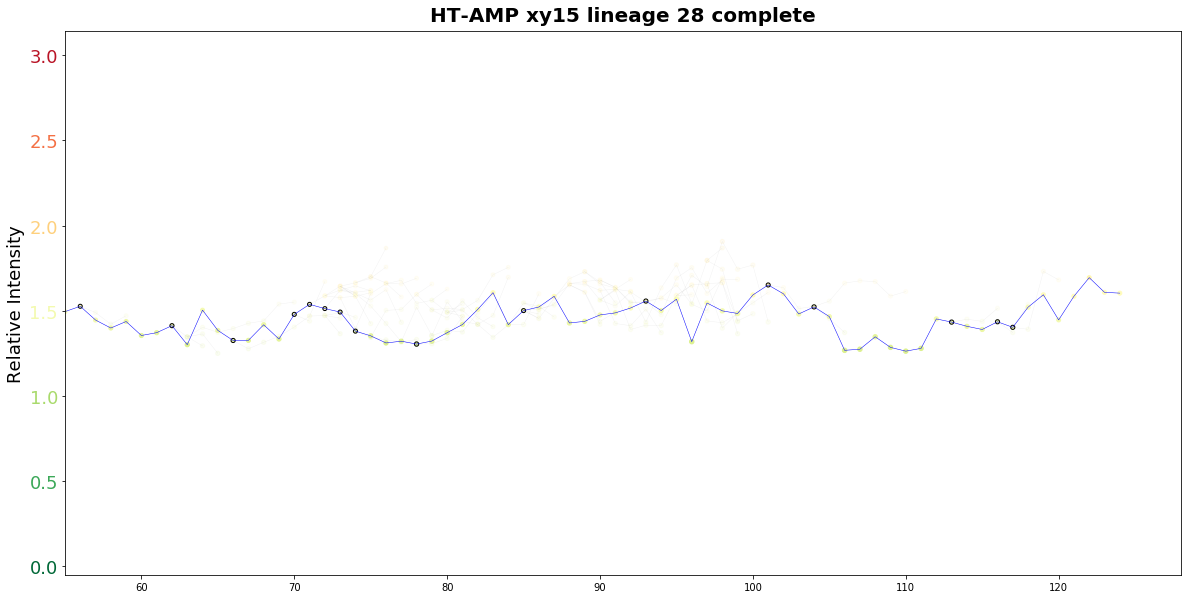

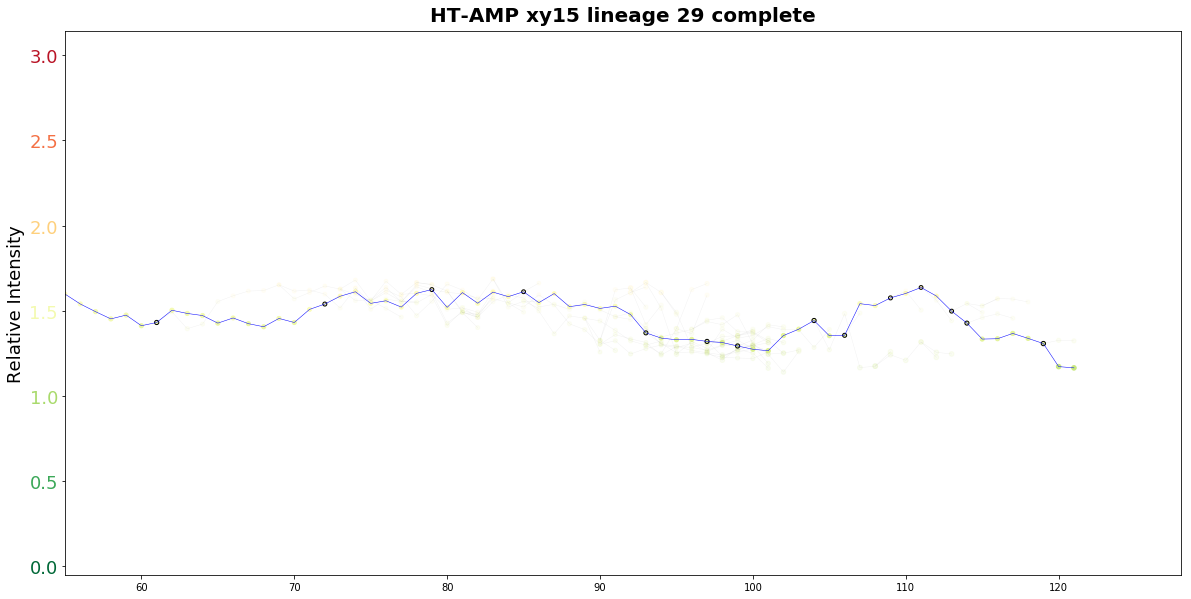

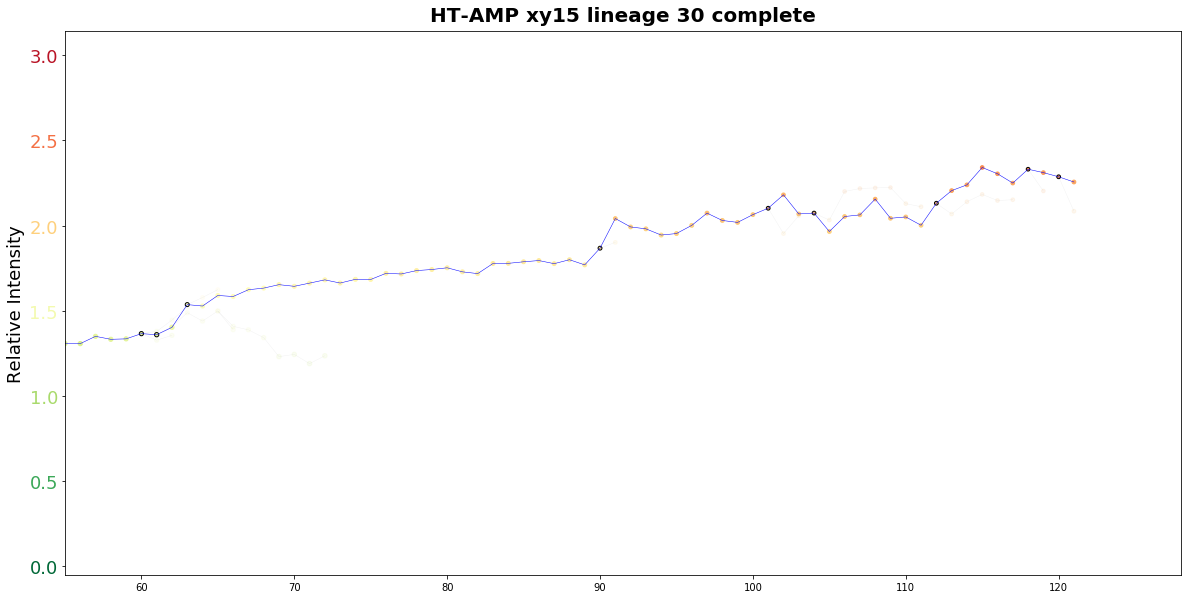

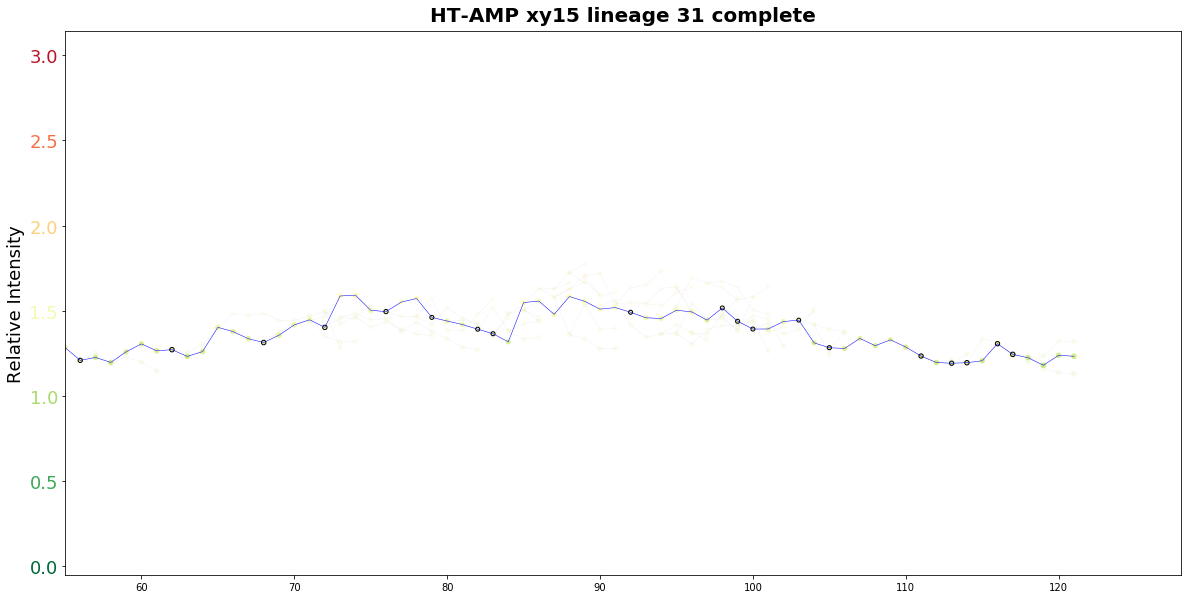

In [9]:
def plot_fancy_tracks(ax,this_df,alphs,alphp):
    
    phis01=list(this_df["RelInt"])
    rhos01=list(this_df["AbsInt"])
    frames=list(this_df["frame"])
    divs=list(this_df["division"])
    
    ss=[x*30 for x in rhos01]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ecolors=colors.copy()
    for ic,div in enumerate(divs):
        if div==1:
            ecolors[ic]=(0.0, 0.0, 0.0, 1.0)
    
    
    
    if(alphs==1):
        ax.scatter(frames,phis01,s=ss,c=colors,alpha=alphs,edgecolors=ecolors,zorder=2)
        ax.plot(frames, phis01,c='b',linewidth=.5,alpha=alphp,zorder=2)
    else:
        ax.scatter(frames,phis01,s=ss,c=colors,alpha=alphs)
        ax.plot(frames, phis01,c='k',linewidth=.5,alpha=alphp)

    return ax



for i,trap in enumerate(trap_list):
    dir_images=rootDir+'figures/lineages/time_series/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)

    
    df_lineages=trap_df_lineages[i]
    print(trap)

    for linID in df_lineages.lineageID.unique():

        this_ldf=df_lineages[df_lineages["lineageID"]==linID]
        frames=this_ldf.frame.unique()
        nframes=len(frames)
        if(nframes<maxFramesThr):
            continue
        fig= plt.figure( figsize=(20, 10))
        ax=plt.subplot()
        longest_track=""
        maxFrames=0
        for trackID in this_ldf.trackID.unique():
            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            frames=this_tdf.frame.unique()
            nframes=len(frames)
            if maxFrames<nframes: 
                maxFrames=nframes
                longest_track=trackID

        for trackID in this_ldf.trackID.unique():
            alphs=.1
            alphp=.05
            if trackID==longest_track:
                alphs=1
                alphp=1

            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            ax=plot_fancy_tracks(ax,this_tdf,alphs,alphp)
        yt=np.linspace(0,3,7)
            #print(yt)
        ax.set_yticks(yt)
        yts1=ax.get_yticklabels()
        
        #ytl=[str(y) for y in yts1]
        ytc=cmap([1-y/np.pi for y in yt])
        
        for ticklabel, tickcolor in zip(yts1, ytc):
            ticklabel.set_color(tickcolor)
            ticklabel.set_fontsize(18)
        ax.set_ylabel("Relative Intensity",fontsize=18)
        
        ax.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax.set_ylim(ymin=-0.05,ymax=np.pi)
        ax.set_title("%s %s lineage %s complete"%(expeLabel,trap,linID), va='bottom',fontweight='bold',fontsize=20)
        figName="%s%s_%s_lineage-%s_complete.png"%(dir_images,expeLabel,trap,linID)
        plt.savefig(figName)
        plt.show()

xy15


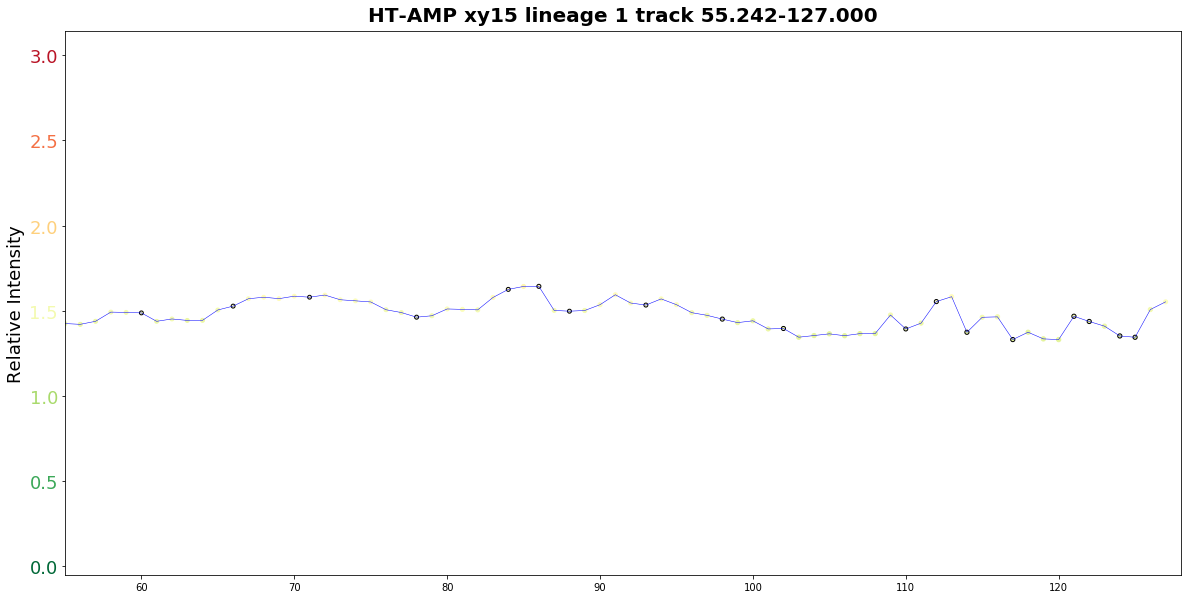

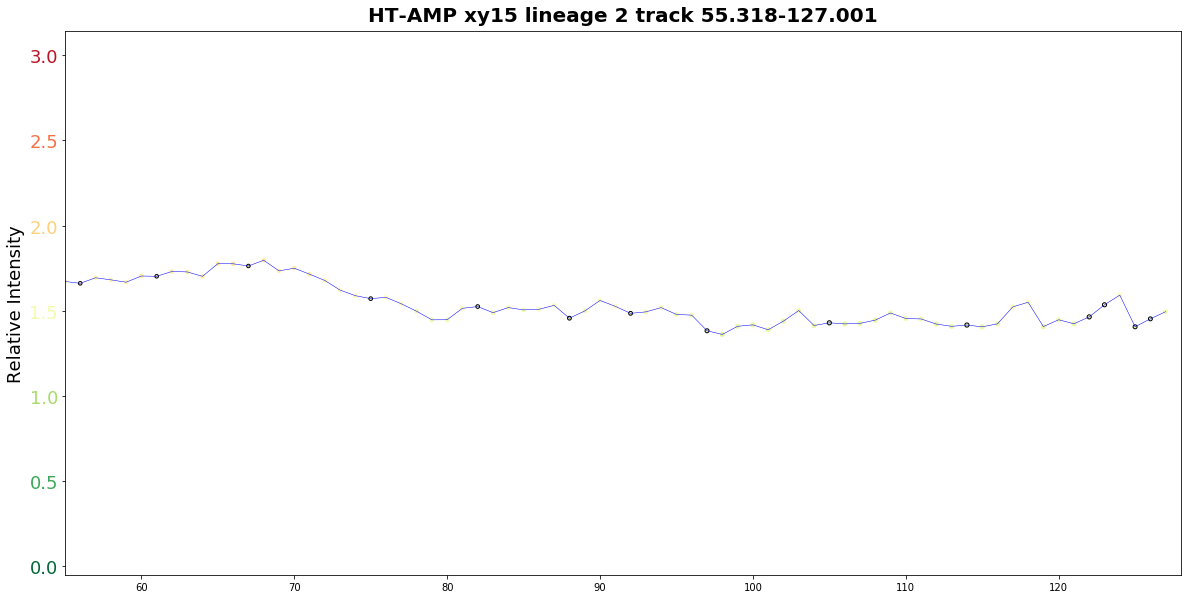

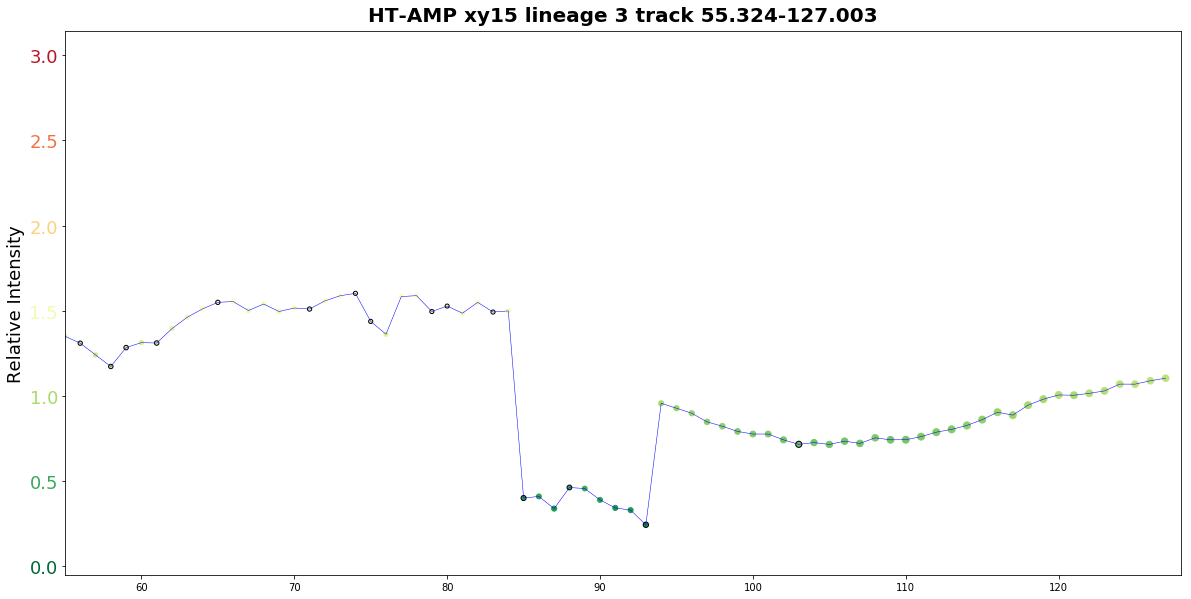

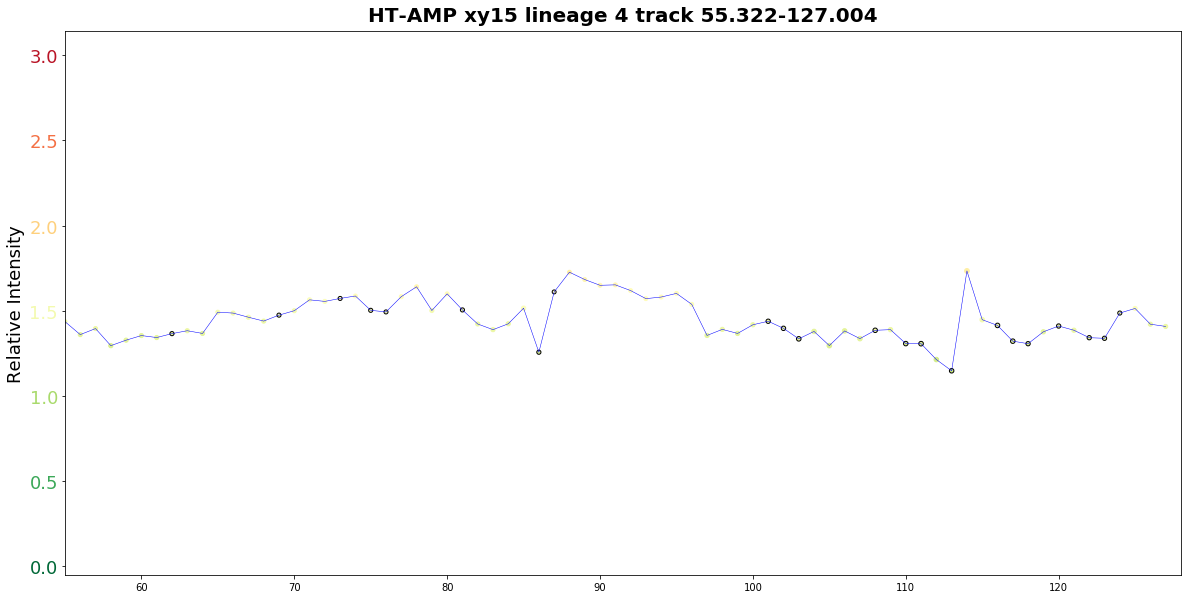

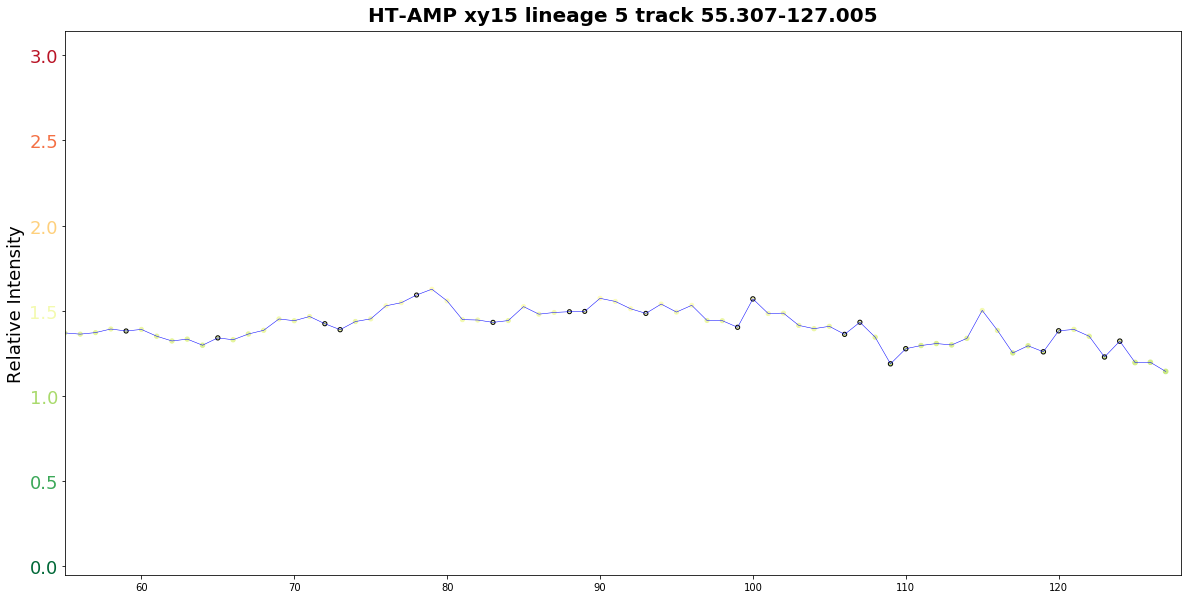

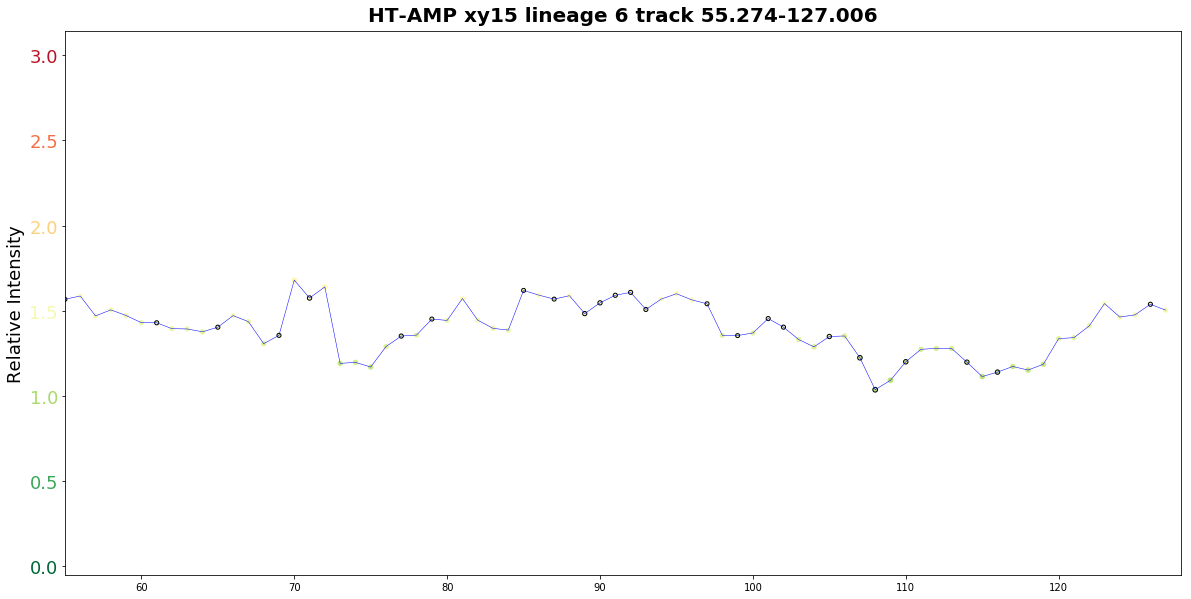

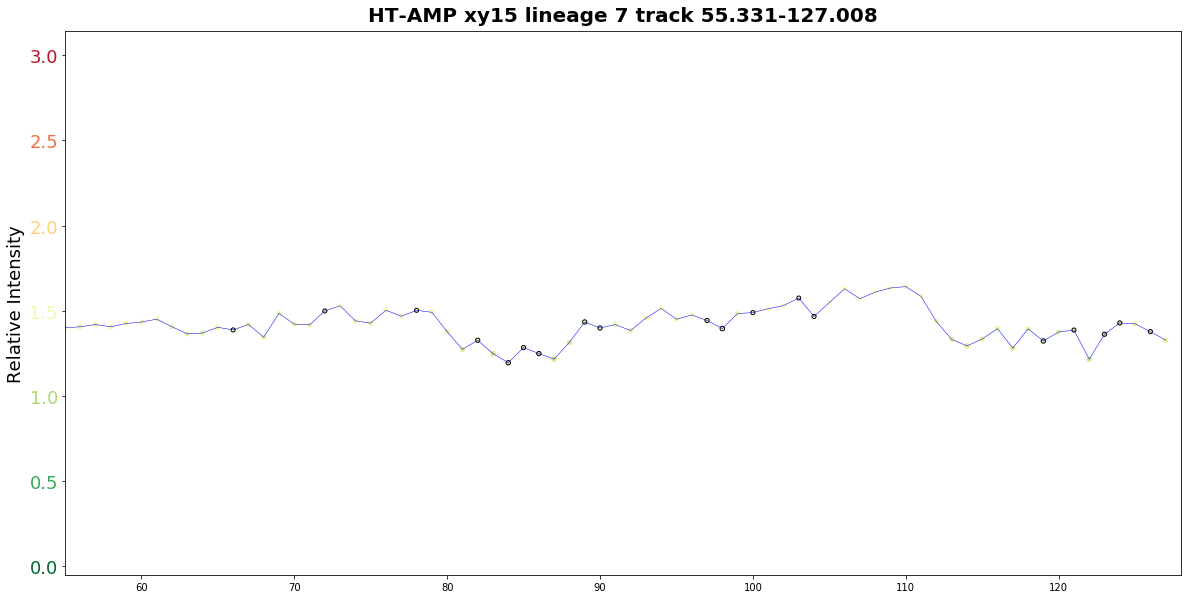

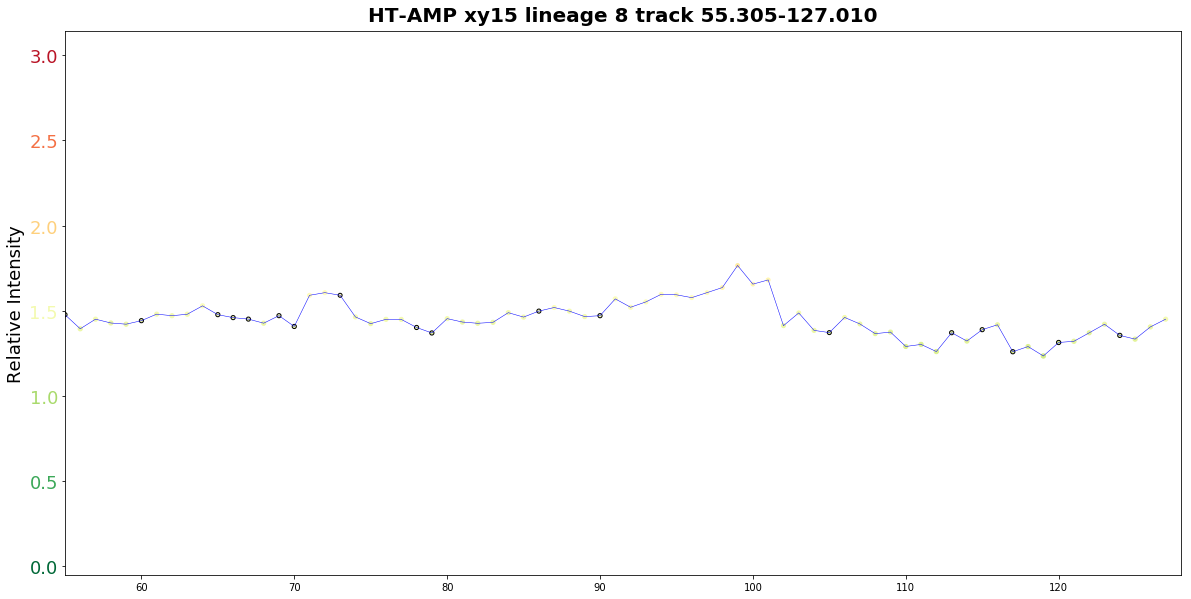

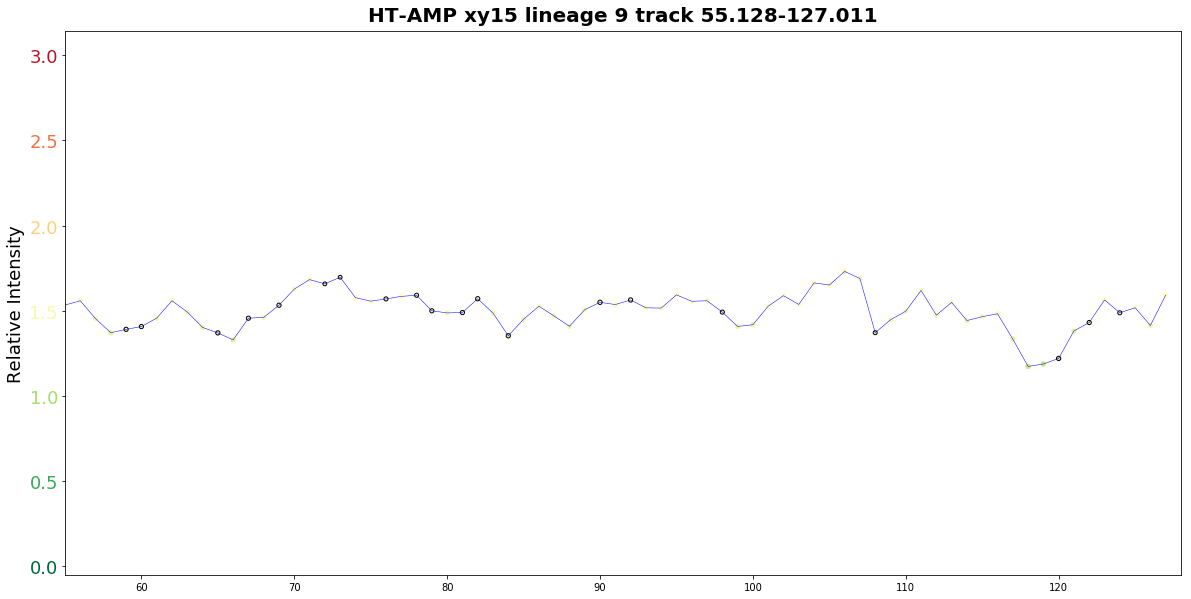

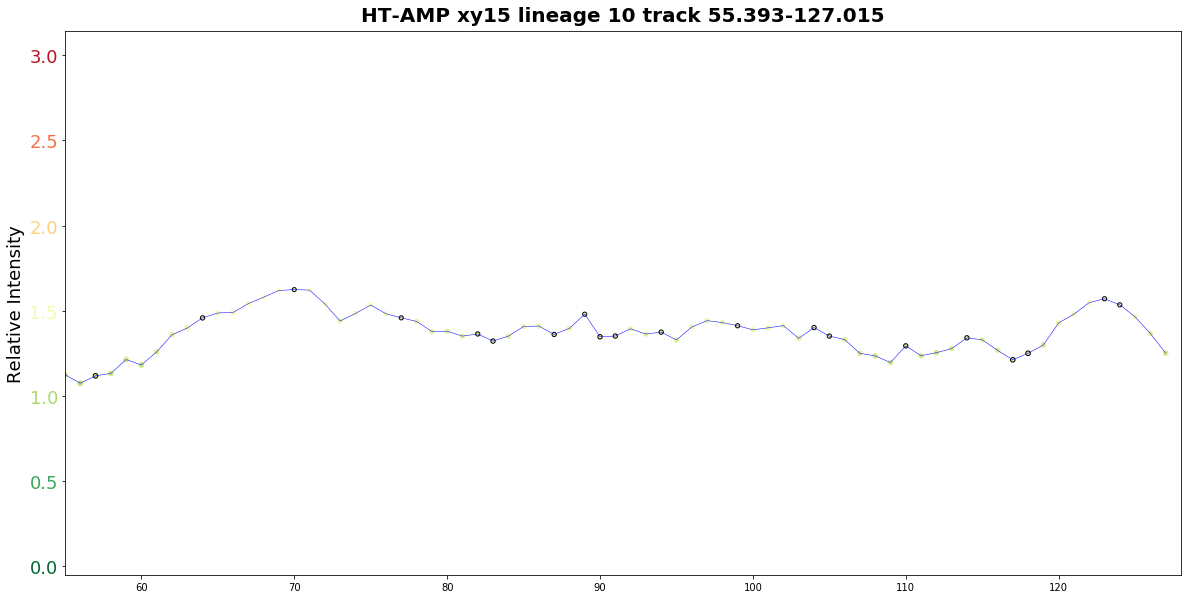

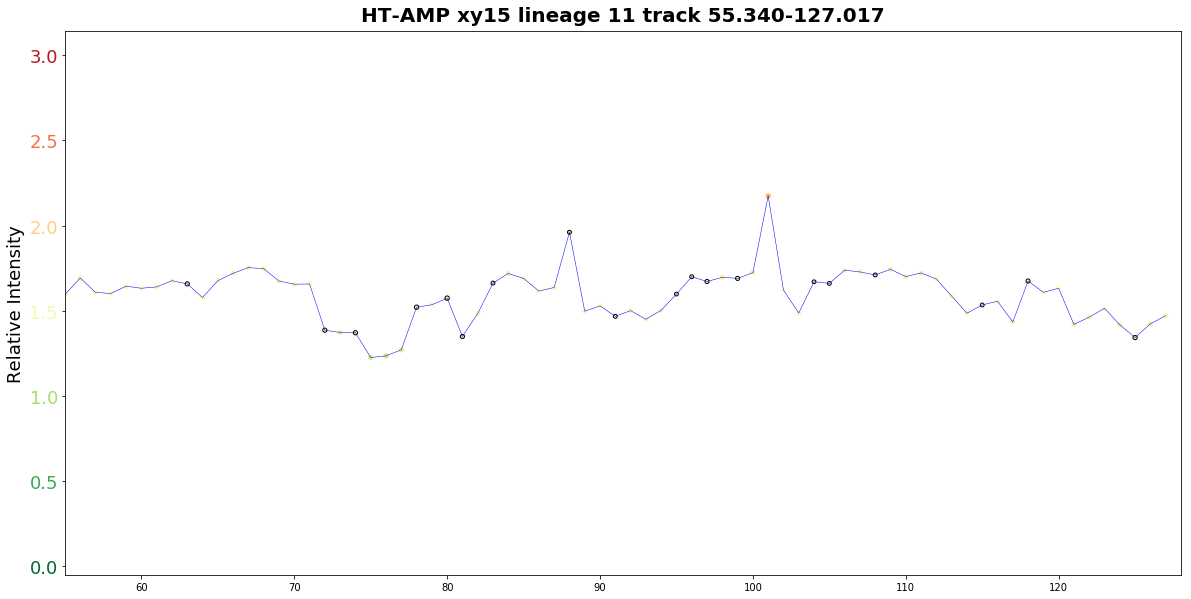

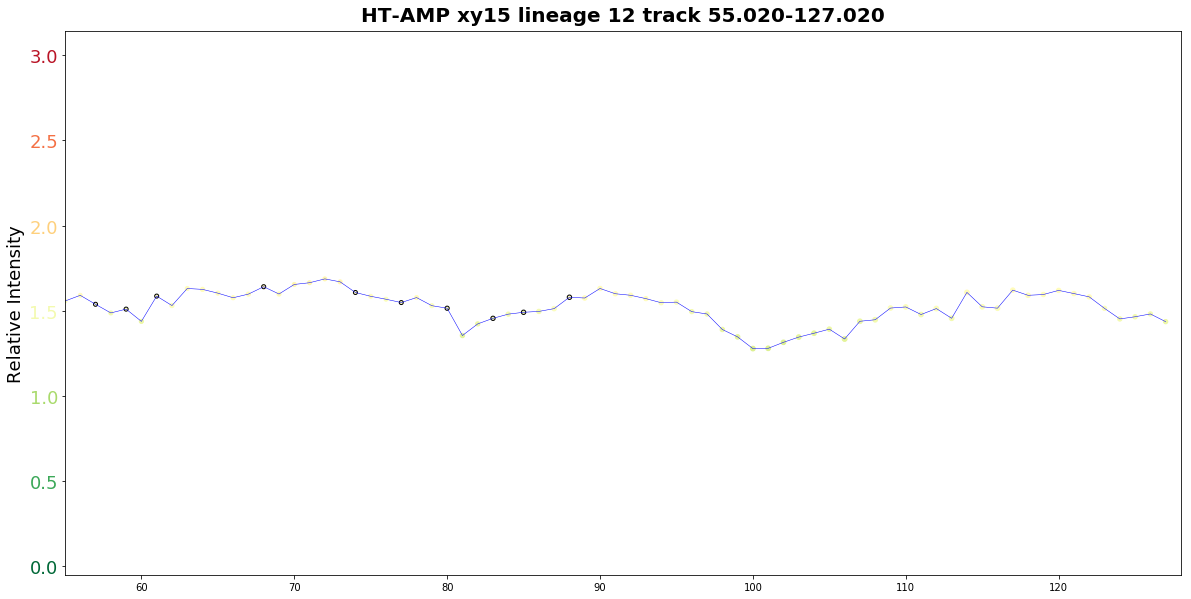

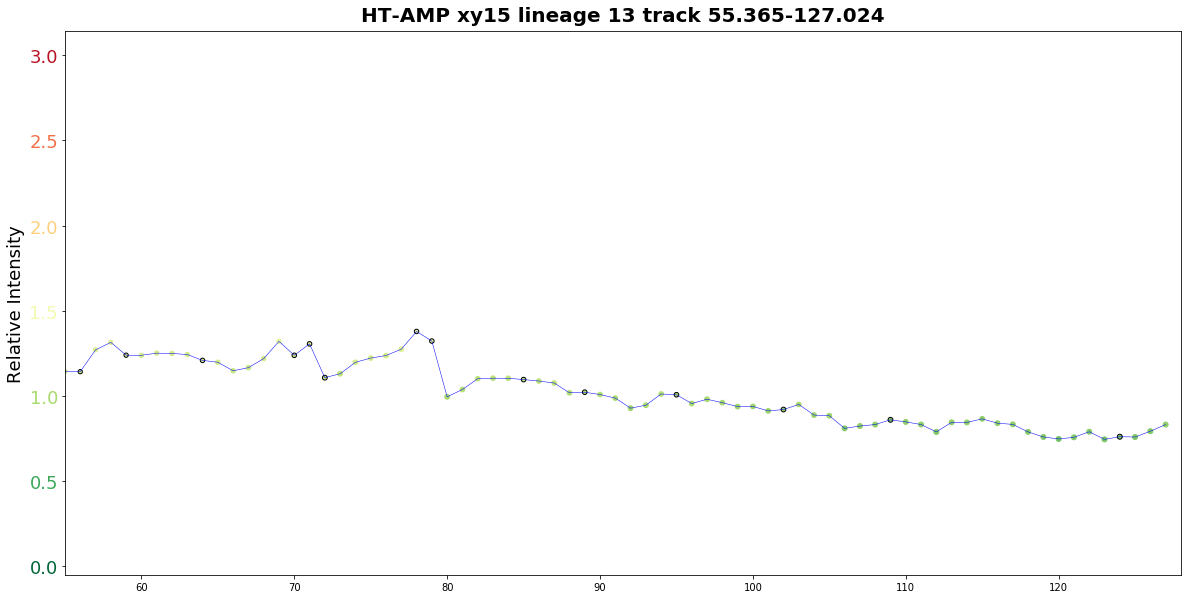

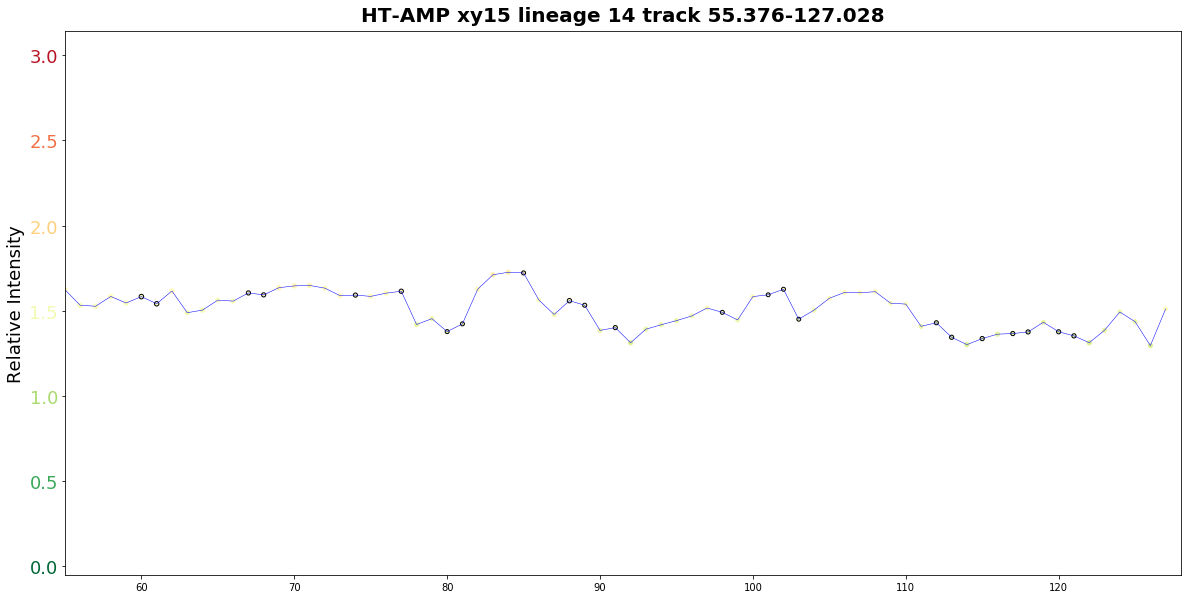

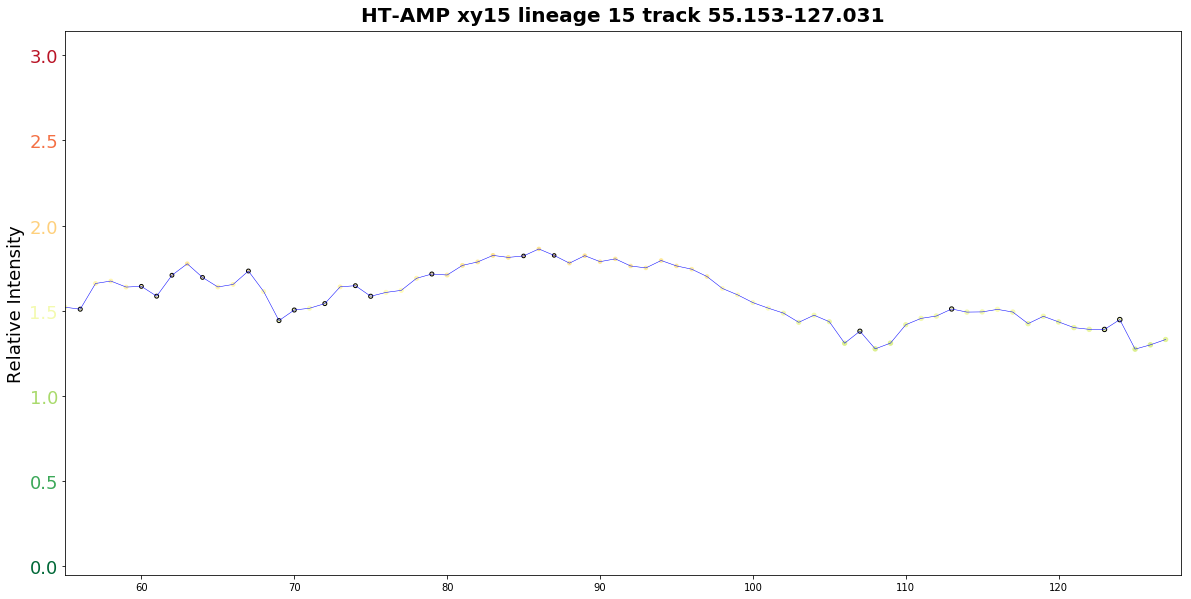

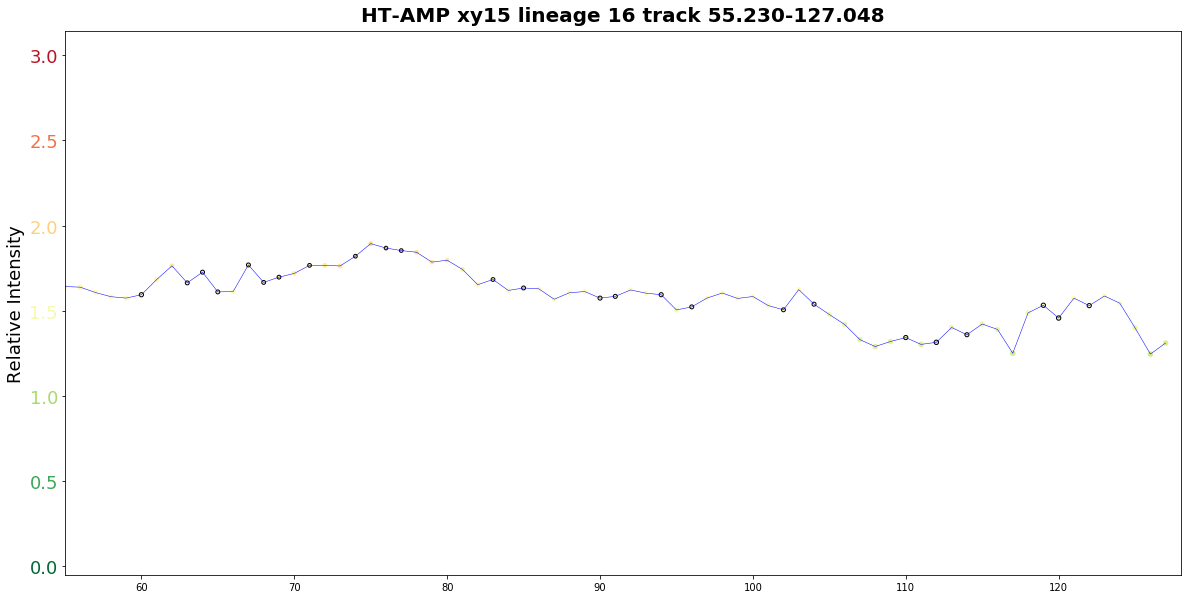

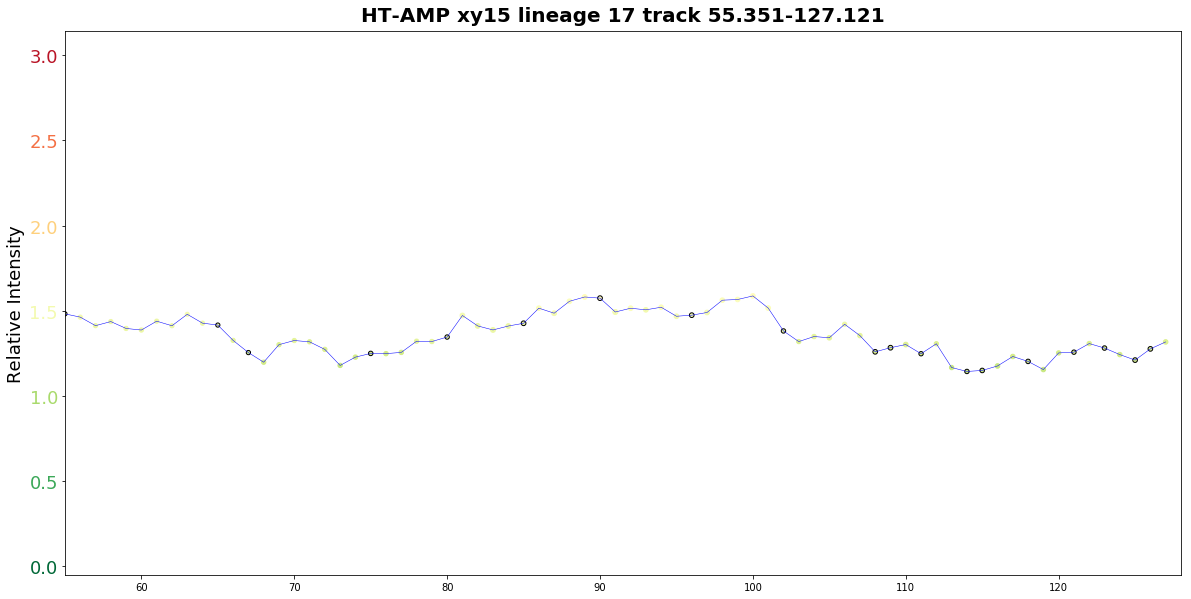

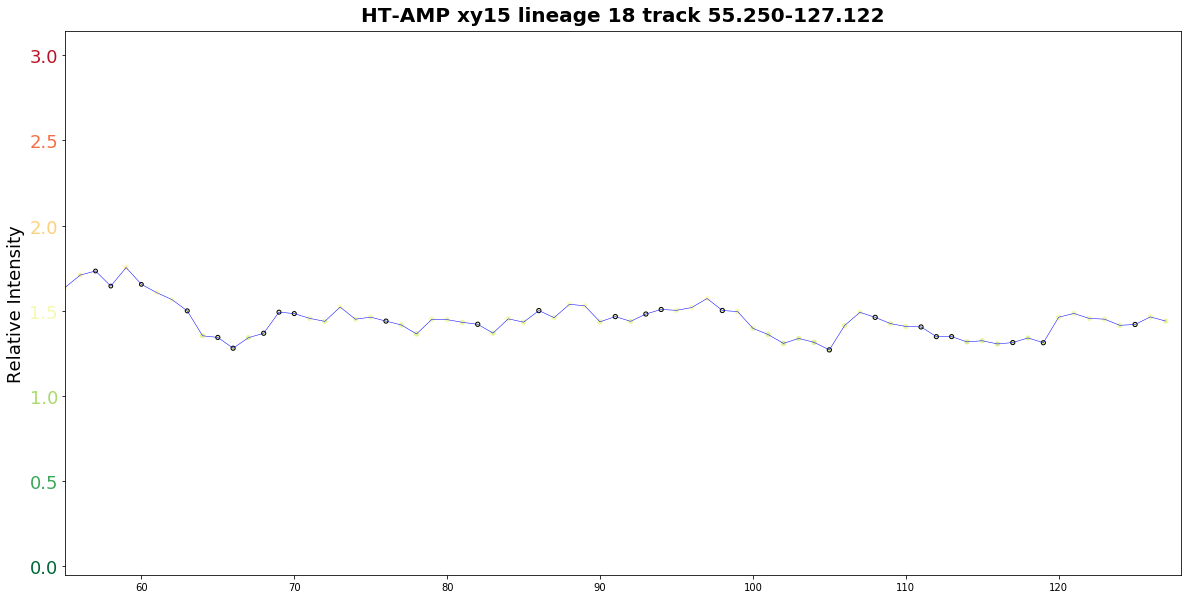

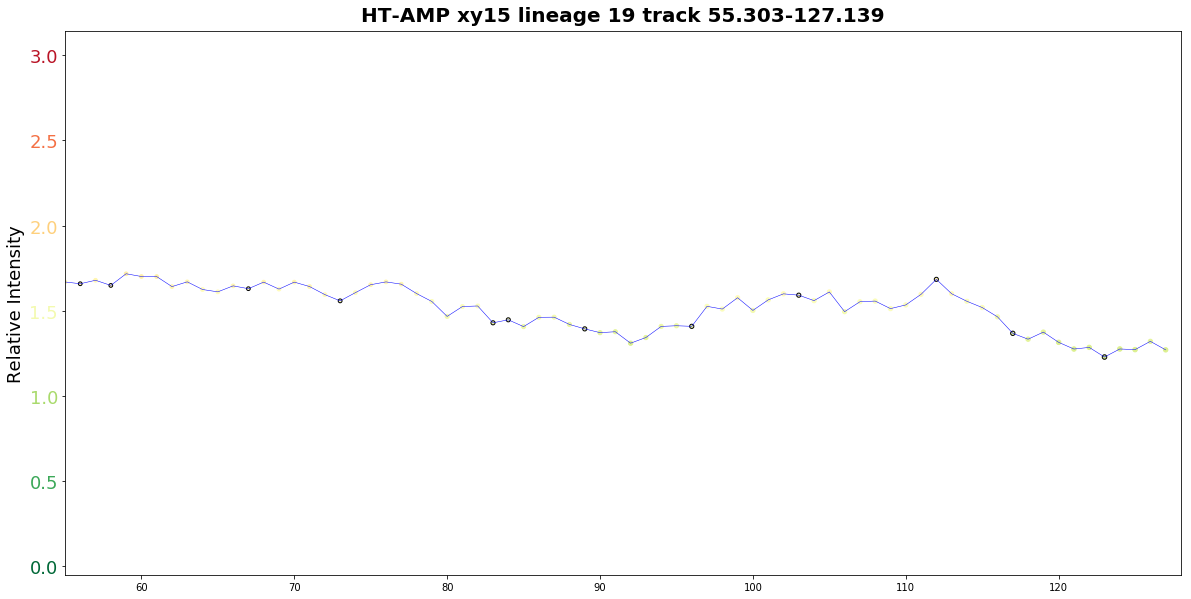

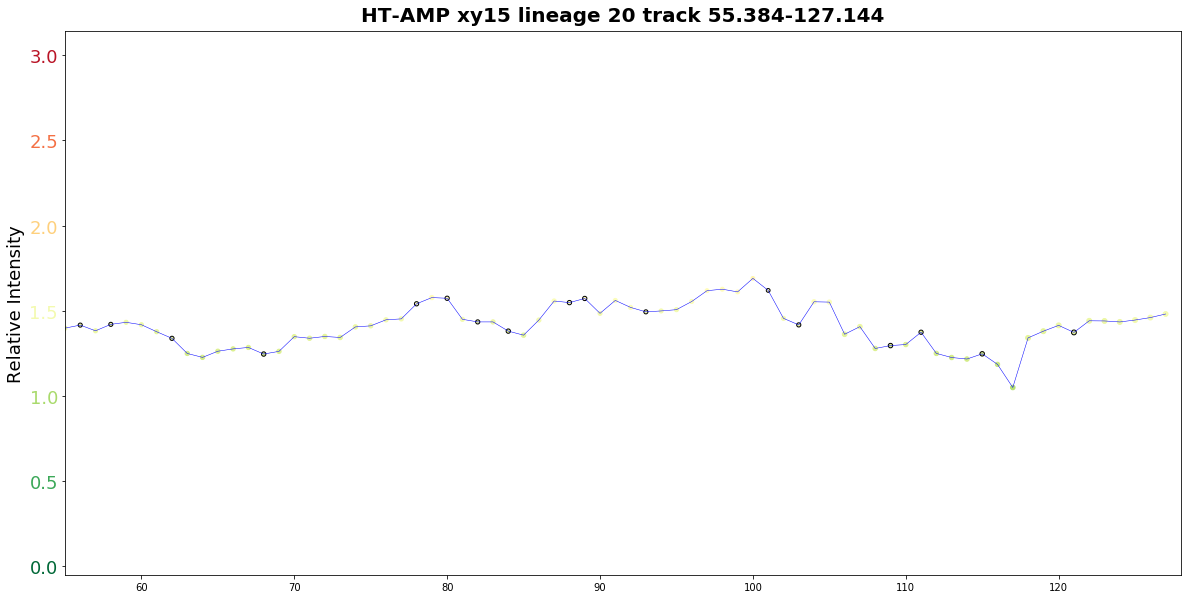

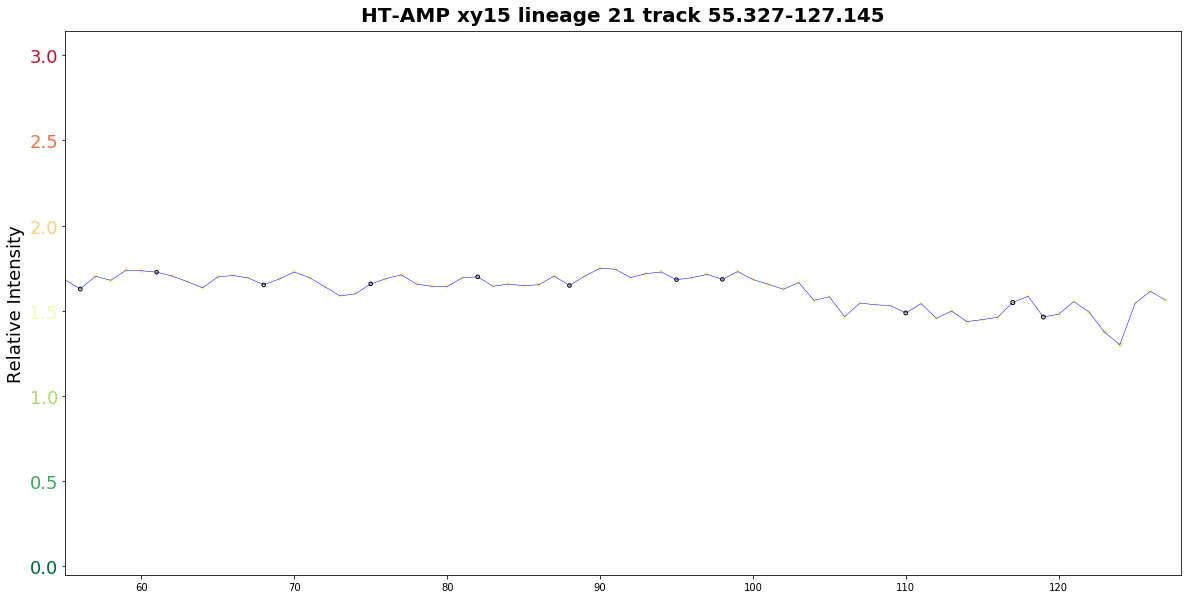

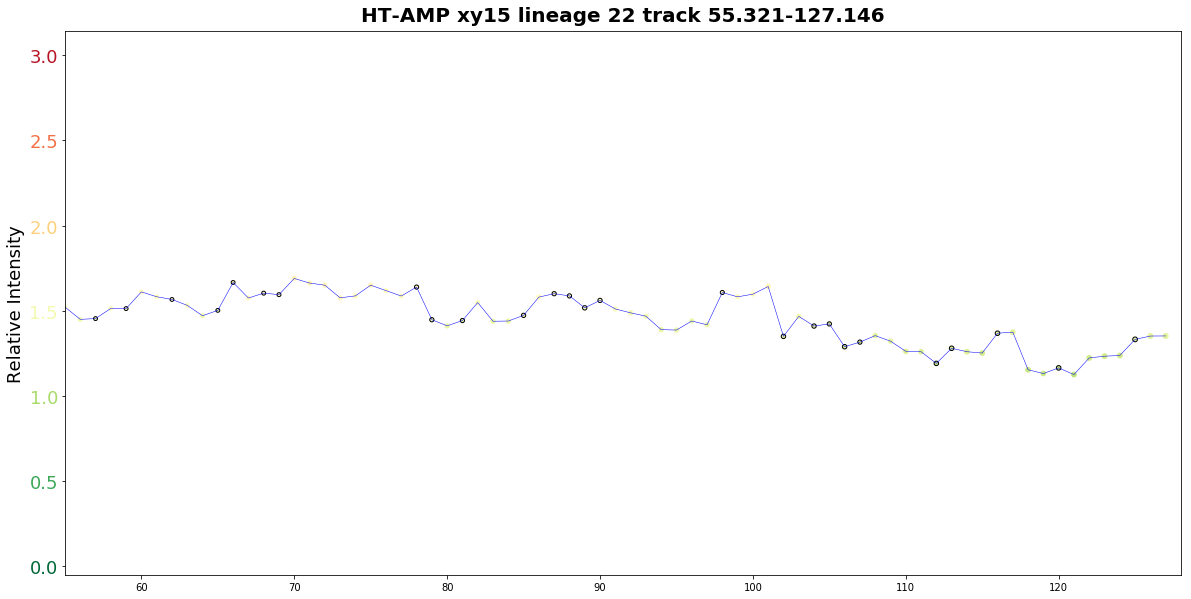

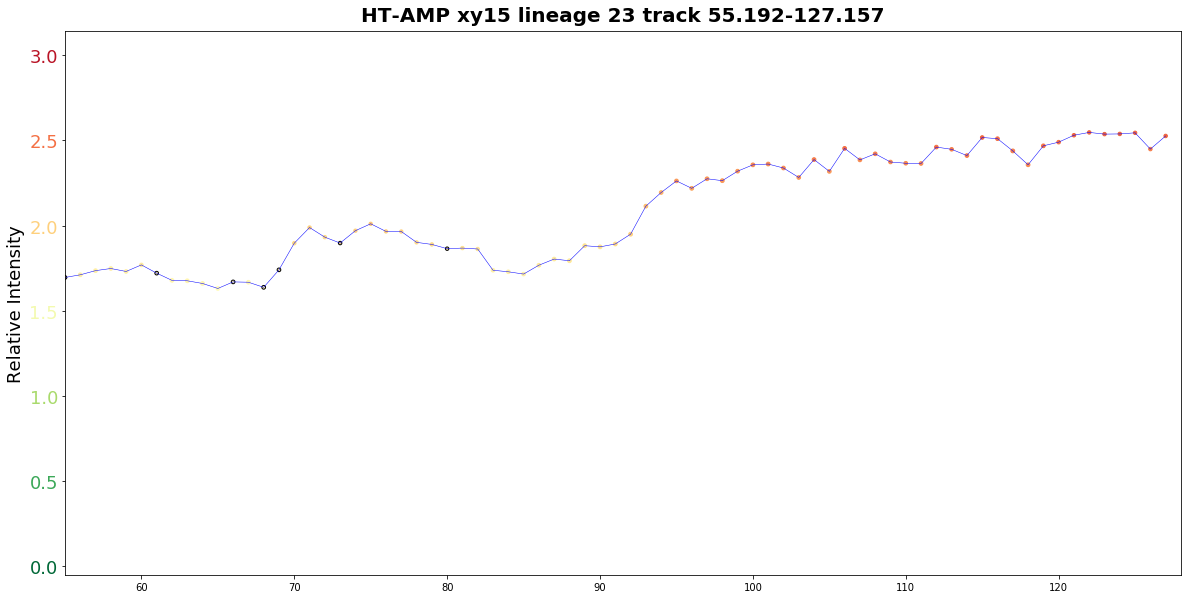

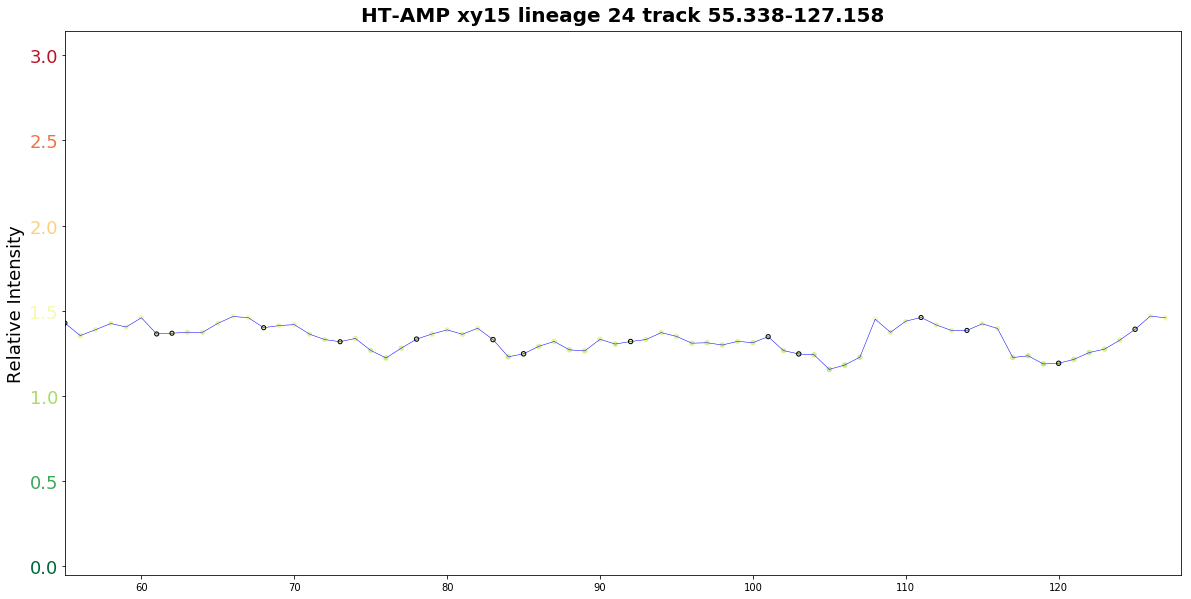

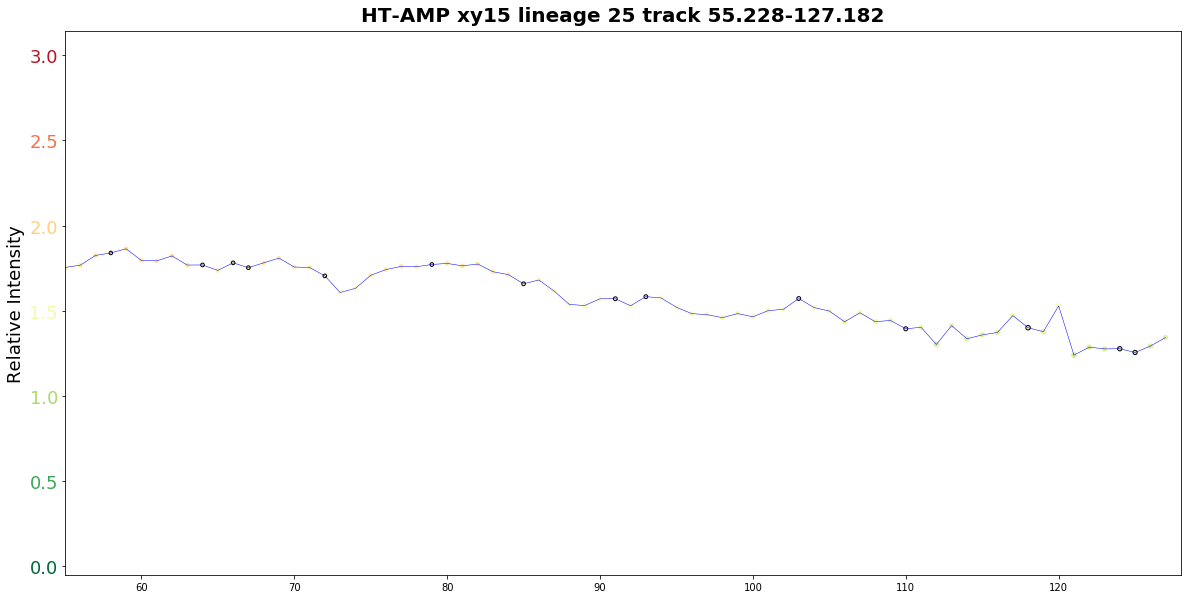

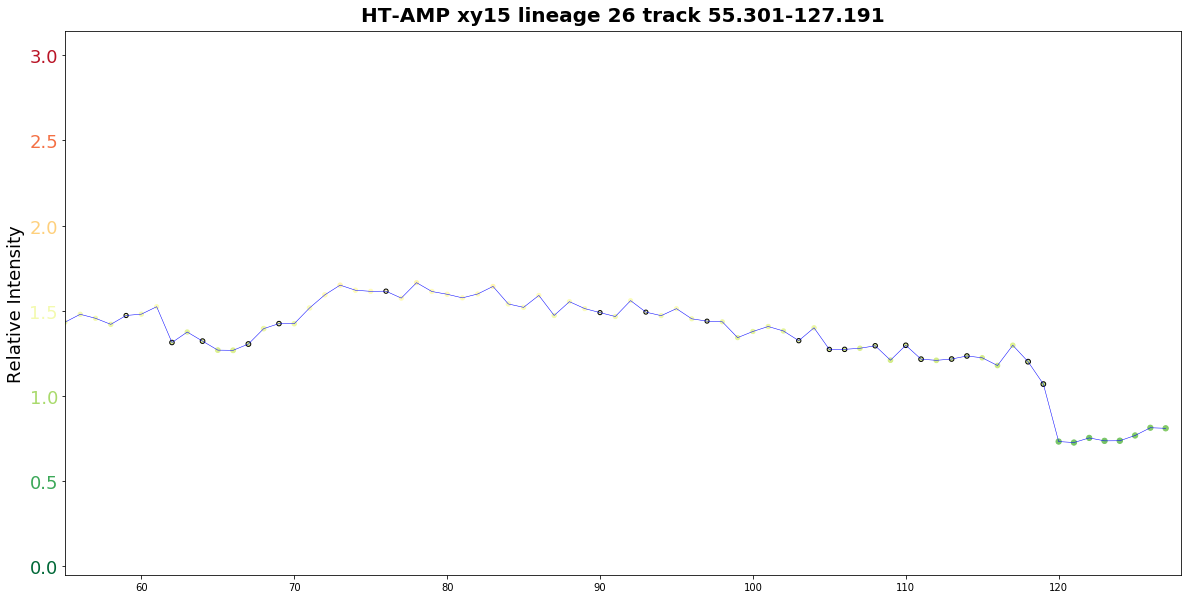

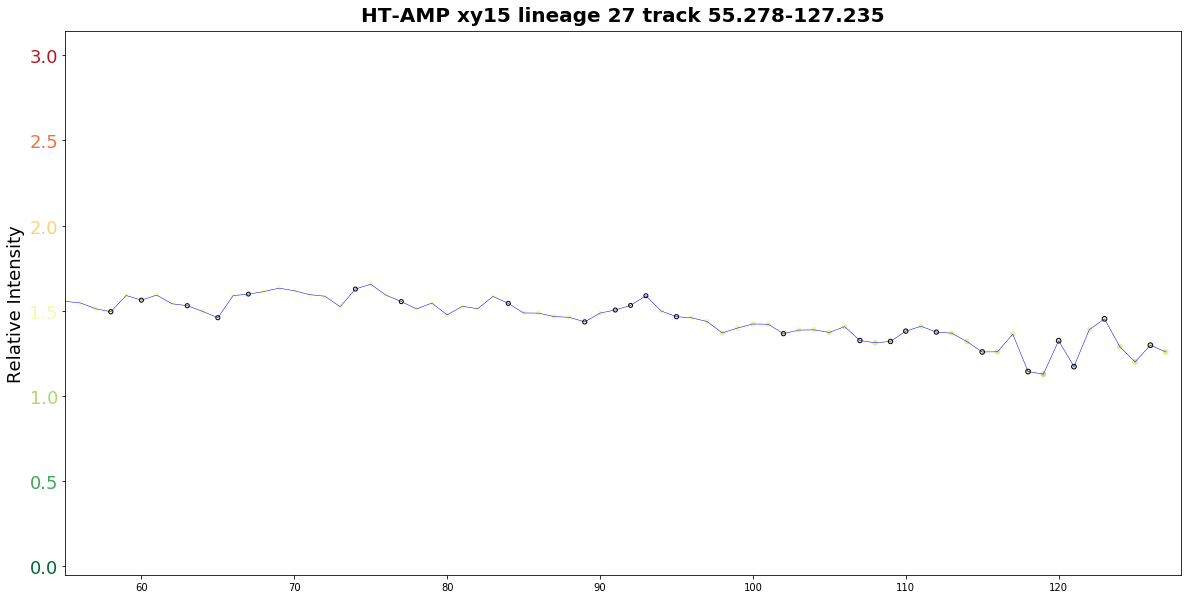

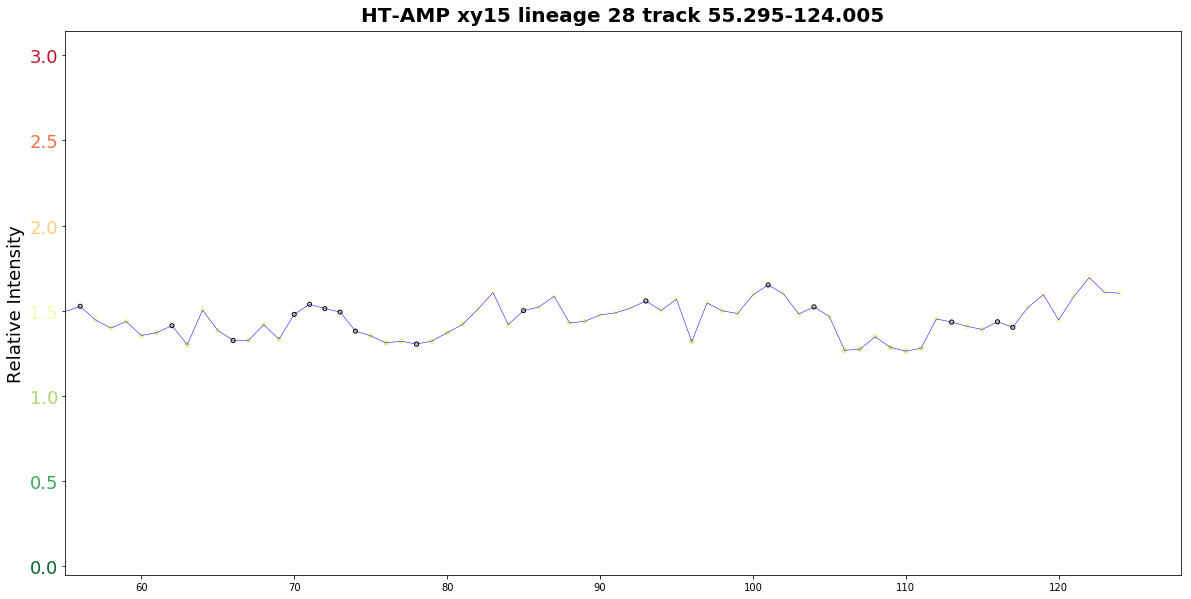

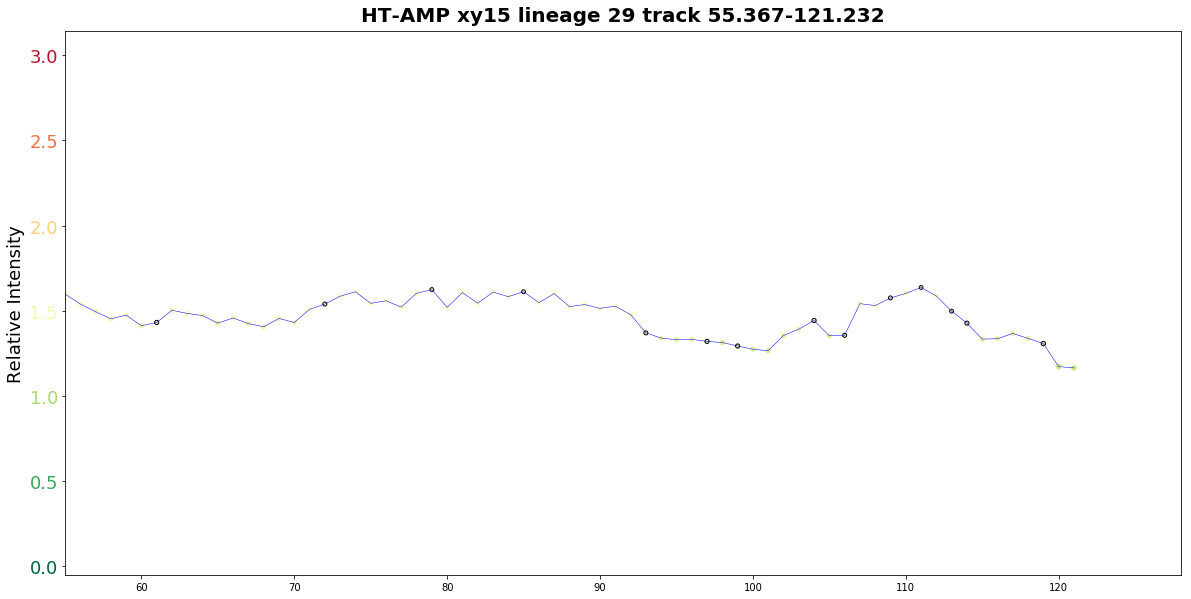

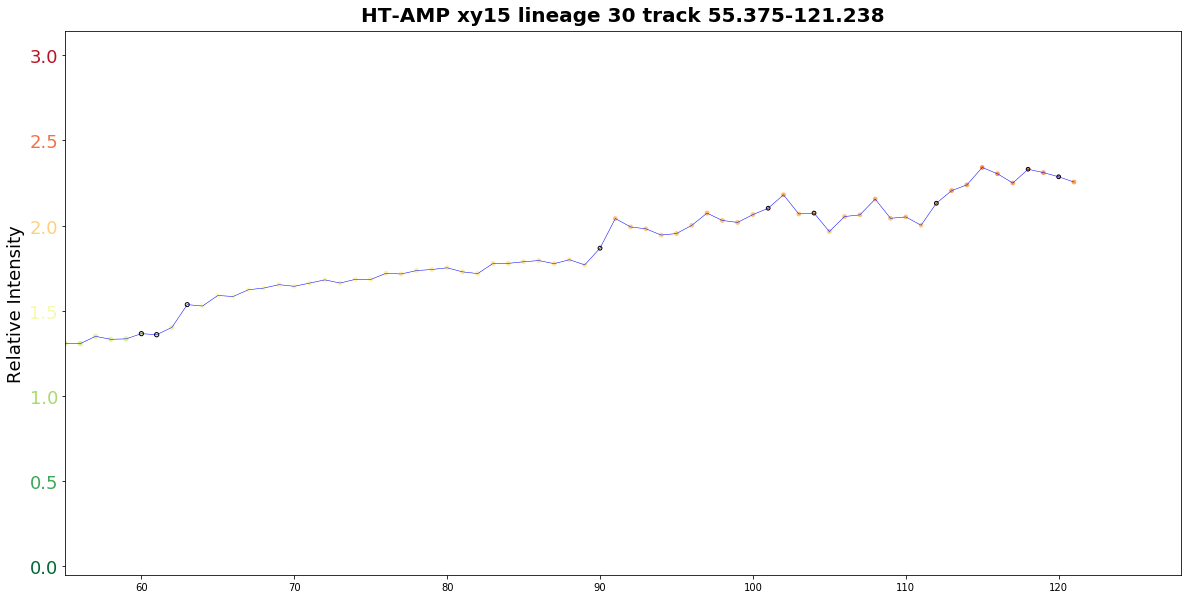

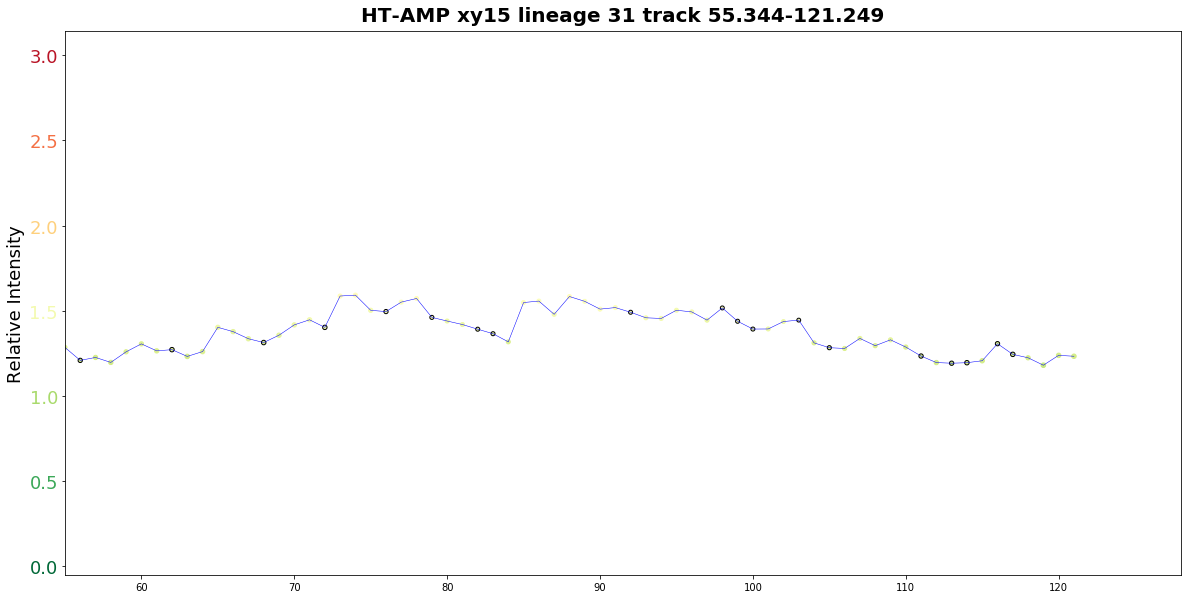

In [10]:
def plot_fancy_tracks(ax,this_df,alphs,alphp):
    
    phis01=list(this_df["RelInt"])
    rhos01=list(this_df["AbsInt"])
    frames=list(this_df["frame"])
    divs=list(this_df["division"])
    
    ss=[x*30 for x in rhos01]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ecolors=colors.copy()
    for ic,div in enumerate(divs):
        if div==1:
            ecolors[ic]=(0.0, 0.0, 0.0, 1.0)
    
    
    
    if(alphs==1):
        ax.scatter(frames,phis01,s=ss,c=colors,alpha=alphs,edgecolors=ecolors,zorder=2)
        ax.plot(frames, phis01,c='b',linewidth=.5,alpha=alphp,zorder=2)
    else:
        ax.scatter(frames,phis01,s=ss,c=colors,alpha=alphs)
        ax.plot(frames, phis01,c='k',linewidth=.5,alpha=alphp)

    return ax



for i,trap in enumerate(trap_list):
    dir_images=rootDir+'figures/lineages/time_series/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)

    
    df_lineages=trap_df_lineages[i]
    print(trap)

    for linID in df_lineages.lineageID.unique():

        this_ldf=df_lineages[df_lineages["lineageID"]==linID]
        frames=this_ldf.frame.unique()
        nframes=len(frames)
        if(nframes<maxFramesThr):
            continue
        fig= plt.figure( figsize=(20, 10))
        ax=plt.subplot()
        longest_track=""
        maxFrames=0
        for trackID in this_ldf.trackID.unique():
            this_tdf=this_ldf[this_ldf["trackID"]==trackID]
            frames=this_tdf.frame.unique()
            nframes=len(frames)
            if maxFrames<nframes: 
                maxFrames=nframes
                longest_track=trackID

        for trackID in this_ldf.trackID.unique():
            alphs=.1
            alphp=.05
            if trackID==longest_track:
                alphs=1
                alphp=1

                this_tdf=this_ldf[this_ldf["trackID"]==trackID]
                ax=plot_fancy_tracks(ax,this_tdf,alphs,alphp)
        yt=np.linspace(0,3,7)
            #print(yt)
        ax.set_yticks(yt)
        yts1=ax.get_yticklabels()
        
        #ytl=[str(y) for y in yts1]
        ytc=cmap([1-y/np.pi for y in yt])
        
        for ticklabel, tickcolor in zip(yts1, ytc):
            ticklabel.set_color(tickcolor)
            ticklabel.set_fontsize(18)
        ax.set_ylabel("Relative Intensity",fontsize=18)
        ax.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax.set_ylim(ymin=-0.05,ymax=np.pi)
        ax.set_title("%s %s lineage %s track %s"%(expeLabel,trap,linID,longest_track), va='bottom',fontweight='bold',fontsize=20)
        figName="%s%s_%s_TimeSeries_lineage-%s_track-%s.png"%(dir_images,expeLabel,trap,linID,longest_track)
        plt.savefig(figName)
        plt.show()

In [ ]:
# this_imgs=dir_images+"trees/"
# if not os.path.exists(this_imgs):
#     os.makedirs(this_imgs)


# for thislid in lids:
    

#     fig= plt.figure( figsize=(40, 5))
#     gs = gridspec.GridSpec(1, 4, width_ratios=[2, 3,3,3]) 

#     ax=fig.add_subplot(gs[0],projection='polar') 
#     ax1=fig.add_subplot(gs[1]) 
#     ax11 = ax1.twinx()
#     ax2=fig.add_subplot(gs[2]) 
#     ax3=fig.add_subplot(gs[3]) 
#     #ax2 = ax1.twinx()

#     ldf=df_lineages[df_lineages["lineageID"]==thislid]
#     this_trackids=ldf.trackID.unique()
#     #ldf[ldf["trackID"]]
#     #print(this_trackids)
#     #this_df=df_lineages[df_lineages["lineageID"]==lids[2]]
#     #this_df=df_lineages[df_lineages["trackID"]==ltids[0]]

#     for this_tid in this_trackids:
#         this_df=ldf[ldf["trackID"]==this_tid]

#         phis0=list(this_df['RelInt'])
#         rhos0=list(this_df['AbsInt'])
#         this_frames=list(this_df.frame)
#         ss=[r*30 for r in  rhos0]




#         colors=cmap([1-x/np.pi for x in phis0])
#         ax.scatter(phis0, rhos0,s=30,c=colors,alpha=1)
#         ax.plot(phis0, rhos0,c='b',linewidth=1,alpha=1)

        


#         ax1.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
#         ax1.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)
        
#         ax2.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
#         ax2.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)

#         ax11.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
#         ax11.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)
        
#         ax3.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
#         ax3.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)

#     ax.set_rmax(1)
#     ax.set_rticks(ticks=[])
#     ax.set_thetamin(-llim)
#     ax.set_thetamax(180+llim)
#     ax.grid(False)
#     #ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
#     ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
#     ax.set_title("%s"%(thislid), va='bottom',fontweight='bold')
#     ax.title.set_position([.5, .9])

#     ax1.set_ylabel("Relative Intensity" )
#     ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
#     ax1.set_ylim(ymin=-0.05,ymax=np.pi)
#     ax2.set_ylabel("Relative Intensity" )
#     ax2.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
#     ax2.set_ylim(ymin=-0.05,ymax=np.pi)
#     yt=np.linspace(0,3,7)
#         #print(yt)
#     ax1.set_yticks(yt)
#     ax2.set_yticks(yt)
#     yts1=ax1.get_yticklabels()
#     yts2=ax2.get_yticklabels()
#     #ytl=[str(y) for y in yts1]
#     ytc=cmap([1-y/np.pi for y in yt])
#     ax1.set_yticks(yt)
#     for ticklabel, tickcolor in zip(yts1, ytc):
#         ticklabel.set_color(tickcolor)
#     for ticklabel, tickcolor in zip(yts2, ytc):
#         ticklabel.set_color(tickcolor)
#         #ax.set_yticklabels(yt,c=ytc)
#     #ax1.set_ylabel("Relative Intensity" )
#     #ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
#     ax11.set_ylim(ymin=0.,ymax=1)
#     ax11.set_ylabel("Absolute Intensity")
    
#     ax3.set_ylim(ymin=0.,ymax=1)
#     ax3.set_ylabel("Absolute Intensity")
#     ax3.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
#     plt.suptitle("%s LineageID: %s"%(expeLabel,thislid) )
#     plt.savefig("%s%s_lineage-%s.png"%(this_imgs,expeLabel,thislid))
#     plt.show()


## Exporting plots Singles all

In [ ]:
this_imgs=dir_images+"singles/"
if not os.path.exists(this_imgs):
    os.makedirs(this_imgs)


for i,thislid in enumerate(lids):
    

#     fig= plt.figure( figsize=(40, 5))
#     gs = gridspec.GridSpec(1, 4, width_ratios=[2, 3,3,3]) 

#     ax=fig.add_subplot(gs[0],projection='polar') 
#     ax1=fig.add_subplot(gs[1]) 
#     ax11 = ax1.twinx()
#     ax2=fig.add_subplot(gs[2]) 
#     ax3=fig.add_subplot(gs[3]) 
#     #ax2 = ax1.twinx()

    ldf=df_lineages[df_lineages["lineageID"]==thislid]
    this_trackids=ldf.trackID.unique()
    #ldf[ldf["trackID"]]
    #print(this_trackids)
    #this_df=df_lineages[df_lineages["lineageID"]==lids[2]]
    #this_df=df_lineages[df_lineages["trackID"]==ltids[0]]

    for this_tid in this_trackids:
        
        this_df=ldf[ldf["trackID"]==this_tid]

        phis0=list(this_df['RelInt'])
        rhos0=list(this_df['AbsInt'])
        this_frames=list(this_df.frame)
        
        
        if(len(this_frames)<20):
            continue
        
        
        fig= plt.figure( figsize=(40, 5))
        gs = gridspec.GridSpec(1, 4, width_ratios=[2, 3,3,3]) 

        ax=fig.add_subplot(gs[0],projection='polar') 
        ax1=fig.add_subplot(gs[1]) 
        ax11 = ax1.twinx()
        ax2=fig.add_subplot(gs[2]) 
        ax3=fig.add_subplot(gs[3]) 
        



        colors=cmap([1-x/np.pi for x in phis0])
        ax.scatter(phis0, rhos0,s=30,c=colors,alpha=1)
        ax.plot(phis0, rhos0,c='b',linewidth=1,alpha=1)
#         startp=phis0[0]
#         startr=rhos0[0]
#         endp=phis0[-1]
#         endr=rhos0[-1]
        #ax.scatter(startp,startr,s=30,c='k',zorder=3)
        #ax.scatter(endp,endr,s=30,c='k',zorder=3)
        


        ax1.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
        ax1.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)
        
        ax2.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
        ax2.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)

        ax11.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
        ax11.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)
        
        ax3.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
        ax3.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)

        ax.set_rmax(1)
        ax.set_rticks(ticks=[])
        ax.set_thetamin(-llim)
        ax.set_thetamax(180+llim)
        ax.grid(False)
    #ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
        ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
        ax.set_title("%s"%(thislid), va='bottom',fontweight='bold')
        ax.title.set_position([.5, .9])

        ax1.set_ylabel("Relative Intensity" )
        ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax1.set_ylim(ymin=-0.05,ymax=np.pi)
        ax2.set_ylabel("Relative Intensity" )
        ax2.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax2.set_ylim(ymin=-0.05,ymax=np.pi)
        yt=np.linspace(0,3,7)
        #print(yt)
        ax1.set_yticks(yt)
        ax2.set_yticks(yt)
        yts1=ax1.get_yticklabels()
        yts2=ax2.get_yticklabels()
    #ytl=[str(y) for y in yts1]
        ytc=cmap([1-y/np.pi for y in yt])
        ax1.set_yticks(yt)
        for ticklabel, tickcolor in zip(yts1, ytc):
            ticklabel.set_color(tickcolor)
        for ticklabel, tickcolor in zip(yts2, ytc):
            ticklabel.set_color(tickcolor)
        #ax.set_yticklabels(yt,c=ytc)
    #ax1.set_ylabel("Relative Intensity" )
    #ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax11.set_ylim(ymin=0.,ymax=1)
        ax11.set_ylabel("Absolute Intensity")
    
        ax3.set_ylim(ymin=0.,ymax=1)
        ax3.set_ylabel("Absolute Intensity")
        ax3.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        plt.suptitle("%s LineageID: %s trackID%s"%(expeLabel,thislid,this_tid) )
        plt.savefig("%s%s_lineage-%s_trackID-%s.png"%(this_imgs,expeLabel,thislid,this_tid))
        
        plt.close()
        fig= plt.figure()
        #gc.collect()
        #plt=[]
        plt.close(fig)
        plt.cla()
        plt.clf()
        plt.close('all')
        #plt.show()
        #display(fig)
        #x=fig.get_gid
        
        #print(x)
        #fig.remove
        #display(fig)
        #fig= plt.figure( figsize=(1, 1))
        
    print(i,len(lids),end="\r")
    
    
        


## Exporting plots Singles long

In [ ]:
this_imgs=dir_images+"singles_long/"
if not os.path.exists(this_imgs):
    os.makedirs(this_imgs)


for thislid in lids:
    


    ldf=df_lineages[df_lineages["lineageID"]==thislid]
    this_trackids=ldf.trackID.unique()
    #ldf[ldf["trackID"]]
    #print(this_trackids)
    #this_df=df_lineages[df_lineages["lineageID"]==lids[2]]
    #this_df=df_lineages[df_lineages["trackID"]==ltids[0]]

    for this_tid in this_trackids:
        this_df=ldf[ldf["trackID"]==this_tid]
        
        phis0=list(this_df['RelInt'])
        rhos0=list(this_df['AbsInt'])
        this_frames=list(this_df.frame)
        if(len(this_frames)<700):
            continue
        
        
        fig= plt.figure( figsize=(40, 5))
        gs = gridspec.GridSpec(1, 4, width_ratios=[2, 3,3,3]) 

        ax=fig.add_subplot(gs[0],projection='polar') 
        ax1=fig.add_subplot(gs[1]) 
        ax11 = ax1.twinx()
        ax2=fig.add_subplot(gs[2]) 
        ax3=fig.add_subplot(gs[3]) 
        
        
        
        
        
        ss=[r*30 for r in  rhos0]




        colors=cmap([1-x/np.pi for x in phis0])
        ax.scatter(phis0, rhos0,s=30,c=colors,alpha=1)
        ax.plot(phis0, rhos0,c='b',linewidth=1,alpha=1)
#         startp=phis0[0]
#         startr=rhos0[0]
#         endp=phis0[-1]
#         endr=rhos0[-1]
        #ax.scatter(startp,startr,s=30,c='k',zorder=3)
        #ax.scatter(endp,endr,s=30,c='k',zorder=3)
        


        ax1.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
        ax1.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)
        
        ax2.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
        ax2.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)

        ax11.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
        ax11.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)
        
        ax3.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
        ax3.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)

        ax.set_rmax(1)
        ax.set_rticks(ticks=[])
        ax.set_thetamin(-llim)
        ax.set_thetamax(180+llim)
        ax.grid(False)
    #ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
        ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
        ax.set_title("%s"%(thislid), va='bottom',fontweight='bold')
        ax.title.set_position([.5, .9])

        ax1.set_ylabel("Relative Intensity" )
        ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax1.set_ylim(ymin=-0.05,ymax=np.pi)
        ax2.set_ylabel("Relative Intensity" )
        ax2.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax2.set_ylim(ymin=-0.05,ymax=np.pi)
        yt=np.linspace(0,3,7)
        #print(yt)
        ax1.set_yticks(yt)
        ax2.set_yticks(yt)
        yts1=ax1.get_yticklabels()
        yts2=ax2.get_yticklabels()
    #ytl=[str(y) for y in yts1]
        ytc=cmap([1-y/np.pi for y in yt])
        ax1.set_yticks(yt)
        for ticklabel, tickcolor in zip(yts1, ytc):
            ticklabel.set_color(tickcolor)
        for ticklabel, tickcolor in zip(yts2, ytc):
            ticklabel.set_color(tickcolor)
        #ax.set_yticklabels(yt,c=ytc)
    #ax1.set_ylabel("Relative Intensity" )
    #ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        ax11.set_ylim(ymin=0.,ymax=1)
        ax11.set_ylabel("Absolute Intensity")
    
        ax3.set_ylim(ymin=0.,ymax=1)
        ax3.set_ylabel("Absolute Intensity")
        ax3.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
        plt.suptitle("%s LineageID: %s"%(expeLabel,thislid) )
        plt.savefig("%s%s_lineage-%s_trackID-%s.png"%(this_imgs,expeLabel,thislid,this_tid))
        plt.show()


In [ ]:
df_lineages[(df_lineages["lineageID"]==0)&(df_lineages["frame"]>410)]

In [ ]:
fig= plt.figure( figsize=(10, 5))

llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
    
ax=fig.add_subplot(1,2,1,projection='polar') 

#phis01=this_df['phis_N01']
#rhos01=this_df['rhos_N01']
phis01=relInt_float
rhos01=absInt_float
rm=max(rhos01)
rhos01=[r/rm for r in rhos01]

#  meanPhi_Nrot,maxRho_N,meanRho_N  

colors=cmap([1-x/np.pi for x in phis01])
ax.scatter(phis01, rhos01,s=10,c=colors,alpha=.1)
#ax.scatter(meanPhi_Nrot,meanRho_N/maxRho_N,c='r',zorder=3)
lphimean=np.mean(phis01)
lrhomean=np.mean(rhos01)
ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
ax.set_rmax(1)
ax.set_rticks(ticks=[])

ax.set_thetamin(-llim)
ax.set_thetamax(180+llim)
ax.grid(False)
#ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
#ax.set_title("%s"%(pop), va='bottom',fontweight='bold')
ax.title.set_position([.5, .9])


plt.show()



fig= plt.figure( figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 

#this_df=df_lineages[df_lineages["lineageID"]==lids[2]]
this_df=df_lineages[df_lineages["trackID"]==ltids[0]]
phis0=list(this_df['RelInt'])
rhos0=list(this_df['AbsInt'])
this_frames=list(this_df.frame)
ss=[r*30 for r in  rhos0]

ax=fig.add_subplot(gs[0],projection='polar') 


colors=cmap([1-x/np.pi for x in phis0])
ax.scatter(phis0, rhos0,s=30,c=colors,alpha=1)
ax.plot(phis0, rhos0,c='b',linewidth=1,alpha=1)
startp=phis0[0]
startr=rhos0[0]
endp=phis0[-1]
endr=rhos0[-1]

ax.scatter(startp,startr,s=30,c='k',zorder=3)
ax.scatter(endp,endr,s=30,c='k',zorder=3)
#ax.set_rmax(1)
#ax.set_rticks(ticks=[])

ax.set_thetamin(-llim)
ax.set_thetamax(180+llim)
ax.grid(False)
#ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
ax.set_title("%s"%(lids[3]), va='bottom',fontweight='bold')
ax.title.set_position([.5, .9])

ax=fig.add_subplot(gs[1]) 

ax.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
#ax.scatter(phis0, ,s=30,c=colors,alpha=1)
ax.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)

ax.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
ax.set_ylim(ymin=-0.05,ymax=np.pi)
yt=np.linspace(0,3,5)
print(yt)
ax.set_yticks(yt)
yts=ax.get_yticklabels()
ytl=[str(y) for y in yts]
ytc=cmap([1-y/np.pi for y in yt])
ax.set_yticks(yt)
for ticklabel, tickcolor in zip(yts, ytc):
    ticklabel.set_color(tickcolor)
#ax.set_yticklabels(yt,c=ytc)
ax.set_ylabel("Relative Intensity" )

ax2 = ax.twinx()

ax2.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
#ax.scatter(phis0, ,s=30,c=colors,alpha=1)
ax2.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)
ax2.set_ylim(ymin=0.,ymax=1)
ax2.set_ylabel("Absolute Intensity")

plt.show()


In [ ]:



fig= plt.figure( figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 

ax=fig.add_subplot(gs[0],projection='polar') 
ax1=fig.add_subplot(gs[1]) 
ax2 = ax1.twinx()

ldf=df_lineages[df_lineages["lineageID"]==0]
this_trackids=ldf.trackID.unique()
#ldf[ldf["trackID"]]
print(this_trackids)
#this_df=df_lineages[df_lineages["lineageID"]==lids[2]]
#this_df=df_lineages[df_lineages["trackID"]==ltids[0]]

for this_tid in this_trackids:
    this_df=ldf[ldf["trackID"]==this_tid]

    phis0=list(this_df['RelInt'])
    rhos0=list(this_df['AbsInt'])
    this_frames=list(this_df.frame)
    ss=[r*30 for r in  rhos0]




    colors=cmap([1-x/np.pi for x in phis0])
    ax.scatter(phis0, rhos0,s=30,c=colors,alpha=1)
    ax.plot(phis0, rhos0,c='b',linewidth=1,alpha=1)
    startp=phis0[0]
    startr=rhos0[0]
    endp=phis0[-1]
    endr=rhos0[-1]

    #ax.scatter(startp,startr,s=30,c='k',zorder=3)
    #ax.scatter(endp,endr,s=30,c='k',zorder=3)
    #ax.set_rmax(1)
    #ax.set_rticks(ticks=[])

    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    #ax.set_thetagrids([0,180],labels=["pBGT","pBRT"])
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    ax.set_title("%s"%(lids[3]), va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])



    ax1.scatter(this_frames, phis0,s=50,c=colors)#,alpha=1)
    #ax.scatter(phis0, ,s=30,c=colors,alpha=1)
    ax1.plot(this_frames,phis0,c='b',linewidth=1,alpha=1)

    ax1.set_xlim(xmin=list_frames[0],xmax=list_frames[-1]+1)
    
    

    ax2.scatter(this_frames, rhos0,s=20,c='gray')#,alpha=1)
    #ax.scatter(phis0, ,s=30,c=colors,alpha=1)
    ax2.plot(this_frames,rhos0,c='gray',linewidth=1,alpha=1)
    
    
ax1.set_ylim(ymin=-0.05,ymax=np.pi)
yt=np.linspace(0,3,7)
    #print(yt)
ax1.set_yticks(yt)
yts=ax1.get_yticklabels()
ytl=[str(y) for y in yts]
ytc=cmap([1-y/np.pi for y in yt])
ax1.set_yticks(yt)
for ticklabel, tickcolor in zip(yts, ytc):
    ticklabel.set_color(tickcolor)
    #ax.set_yticklabels(yt,c=ytc)
ax1.set_ylabel("Relative Intensity" )

ax2.set_ylim(ymin=0.,ymax=1)
ax2.set_ylabel("Absolute Intensity")

plt.show()
